In [1]:
from Yugiquery import *
header()

<div align='center'>
    <br>
    <pre>
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
     - Last modified: 15/12/2022 21:44 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Format data](#Format-data)
    *   [1.3  Save data](#Save-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load latest file](#Load-latest-file)
    *   [2.2  Generate changelog](#Generate-changelog)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Full data](#Full-data)
    *   [3.2  Card types](#Card-types)
    *   [3.3  Monsters](#Monsters)
        *   [3.3.1  Attributes](#Attributes)
        *   [3.3.2  Primary types](#Primary-types)
            *   [3.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [3.3.2.3  By attribute](#By-attribute)
        *   [3.3.3  Secondary types](#Secondary-types)
            *   [3.3.3.1  By attribute](#By-attribute)
            *   [3.3.3.2  By secondary type](#By-secondary-type)
        *   [3.3.4  Monster types](#Monster-types)
            *   [3.3.4.1  By Attribute](#By-Attribute)
            *   [3.3.4.2  By primary type](#By-primary-type)
            *   [3.3.4.3  By secondary type](#By-secondary-type)
        *   [3.3.5  Effect type](#Effect-type)
        *   [3.3.6  ATK](#ATK)
        *   [3.3.7  DEF](#DEF)
        *   [3.3.8  Level/Rank](#Level/Rank)
            *   [3.3.8.1  ATK statistics](#ATK-statistics)
            *   [3.3.8.2  DEF statistics](#DEF-statistics)
        *   [3.3.9  Pendulum scale](#Pendulum-scale)
            *   [3.3.9.1  ATK statistics](#ATK-statistics)
            *   [3.3.9.2  DEF statistics](#DEF-statistics)
            *   [3.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [3.3.10  Link](#Link)
            *   [3.3.10.1  ATK statistics](#ATK-statistics)
        *   [3.3.11  Link Arrows](#Link-Arrows)
            *   [3.3.11.1  By combination](#By-combination)
            *   [3.3.11.2  By unique](#By-unique)
            *   [3.3.11.3  By link](#By-link)
    *   [3.4  Spell & Trap](#Spell-&-Trap)
        *   [3.4.1  Properties](#Properties)
        *   [3.4.2  Effect type](#Effect-type)
            *   [3.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [3.5  Archseries](#Archseries)
        *   [3.5.1  By card type](#By-card-type)
        *   [3.5.2  By primary type](#By-primary-type)
        *   [3.5.3  By secondary type](#By-secondary-type)
        *   [3.5.4  By monster type](#By-monster-type)
        *   [3.5.5  By property](#By-property)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
    *   [3.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [3.8.1  TGC status](#TGC-status)
            *   [3.8.1.1  By card type](#By-card-type)
            *   [3.8.1.2  By monster type](#By-monster-type)
            *   [3.8.1.3  By archseries](#By-archseries)
        *   [3.8.2  OCG status](#OCG-status)
            *   [3.8.2.1  By card type](#By-card-type)
            *   [3.8.2.2  By monster type](#By-monster-type)
            *   [3.8.2.3  By archseries](#By-archseries)
        *   [3.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [4  HTML export](#HTML-export)
*   [5  Git](#Git)
*   [6  Searches](#Searches)

# Data aquisition

## Fetch online data

In [2]:
monster_query = card_query(_property = False)
st_query = card_query(_primary = False, _secondary = False, _attribute = False, _monster_type = False, _stars = False, _atk = False, _def = False, _scale = False, _link = False, _arrows = False)
# Timestamp
timestamp = pd.Timestamp.now().timestamp()
full_df = pd.DataFrame()

# Fetch Spell
spell_df = fetch_spell(st_query, step = 1000, limit = 3000)
full_df = pd.concat([full_df, spell_df], ignore_index=True, axis=0)

# Fetch Trap
trap_df = fetch_trap(st_query, step = 1000, limit = 3000)
full_df = pd.concat([full_df, trap_df], ignore_index=True, axis=0)
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0)

# Fetch Monster
monster_df = fetch_monster(monster_query, step = 1000, limit = 5000)
full_df = pd.concat([full_df, monster_df], ignore_index=True, axis=0)

# Fetch errata
errata_df = pd.concat([fetch_name_errata(), fetch_type_errata()], axis=1).fillna(False)

Iteration 1: 1000 results
Iteration 2: 1000 results
Iteration 3: 381 results
- Total
2381 results

Iteration 1: 1000 results
Iteration 2: 814 results
- Total
1814 results

- DIVINE
Iteration 1: 9 results
- LIGHT
Iteration 1: 1000 results
Iteration 2: 621 results
- DARK
Iteration 1: 1000 results
Iteration 2: 1000 results
Iteration 3: 229 results
- WATER
Iteration 1: 835 results
- EARTH
Iteration 1: 1000 results
Iteration 2: 883 results
- FIRE
Iteration 1: 668 results
- WIND
Iteration 1: 764 results
- Total
8009 results

- Total
532 results

- Total
718 results



## Format data

In [3]:
formatted_spell_df = format_df(spell_df, errata_df)
formatted_trap_df = format_df(trap_df, errata_df)
formatted_st_df = format_df(st_df, errata_df)
formatted_monster_df = format_df(monster_df, errata_df)
formatted_full_df = format_df(full_df, errata_df)
print('Data formated')

Data formated


## Save data

In [4]:
formatted_full_df.to_csv(f'../Data/All_cards_{int(timestamp)}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [5]:
# Get list of files
files_list = sorted(glob.glob('../Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(formatted_full_df.dtypes.to_dict())
    print('File loaded')
else:
    print('No older files')

File loaded


## Generate changelog

In [6]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, formatted_full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../Data/Cards_changelog_{int(timestamp)}.csv', index = False)
        print('Changelog saved')

,OCG status,Modification date,Version
Name,,,
Genex Ally Birdman,Unlimited,Sun Oct 9 01:30:15 2022,Old
Genex Ally Birdman,Limited,Sun Oct 9 01:30:15 2022,New


Changelog saved


# Data visualization

## Full data

In [7]:
formatted_full_df

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,...,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
0,"""A"" Cell Breeding Device",34541863,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Trigger Effect,)",NaN,NaN,"(Name,)",Unlimited,Unlimited,Sat Nov 6 13:57:15 2021
1,"""A"" Cell Incubator",64163367,Spell Card,Continuous Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Continuous-like Effect, Trigger Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Mon Jun 13 04:27:51 2022
2,"""A"" Cell Recombination Device",91231901,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Effect, Ignition-like Effect)",NaN,NaN,NaN,Unlimited,Unlimited,Thu Mar 12 22:40:14 2020
3,"""A"" Cell Scatter Burst",73262676,Spell Card,Quick-Play Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Effect,)",NaN,NaN,NaN,Unlimited,Unlimited,Sat Nov 6 13:58:32 2021
4,"""Infernoble Arms - Durendal""",37478723,Spell Card,Equip Spell Card,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"(Condition, Ignition-like Effect, Trigger Effect)","(Noble Arms,)",NaN,NaN,Unlimited,Unlimited,Sat Aug 20 13:52:48 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12199,Yosenju Shinchu L,65025250,Monster Card,NaN,Effect Monster,NaN,WIND,Rock,4,0,...,3,NaN,NaN,"(Continuous Effect, Continuous-like Effect, Tr...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sun Aug 14 11:04:00 2022
12200,Yosenju Shinchu R,91420254,Monster Card,NaN,Effect Monster,NaN,WIND,Rock,4,0,...,5,NaN,NaN,"(Continuous Effect, Ignition-like Effect, Trig...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sat Aug 13 12:21:48 2022
12201,Yosenju Tsujik,25244515,Monster Card,NaN,Effect Monster,NaN,WIND,Beast-Warrior,4,1000,...,NaN,NaN,NaN,"(Condition, Ignition Effect, Quick Effect, Tri...","(Yosenju,)",NaN,NaN,Unlimited,Unlimited,Sun Dec 20 18:15:02 2020
12202,ZW - Eagle Claw,29353756,Monster Card,NaN,Effect Monster,NaN,WIND,Winged Beast,5,2000,...,NaN,NaN,NaN,"(Continuous-like Effect, Ignition Effect, Uncl...","(ZW -, Zexal)",NaN,NaN,Unlimited,Unlimited,Thu Jul 8 13:48:07 2021


Full data available to download [here](../Data)

## Card types

In [8]:
formatted_full_df.groupby('Card type').nunique()

,Name,Password,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Card type,,,,,,,,,,,,,,,,,,,,
Monster Card,8001,7882,0,8,6,7,25,15,82,77,13,6,62,223,993,3,3,7,7,7955
Spell Card,2379,2357,6,0,0,0,0,0,0,0,0,0,0,116,396,3,3,6,6,2368
Trap Card,1814,1796,3,0,0,0,0,0,0,0,0,0,0,95,325,2,3,6,6,1807


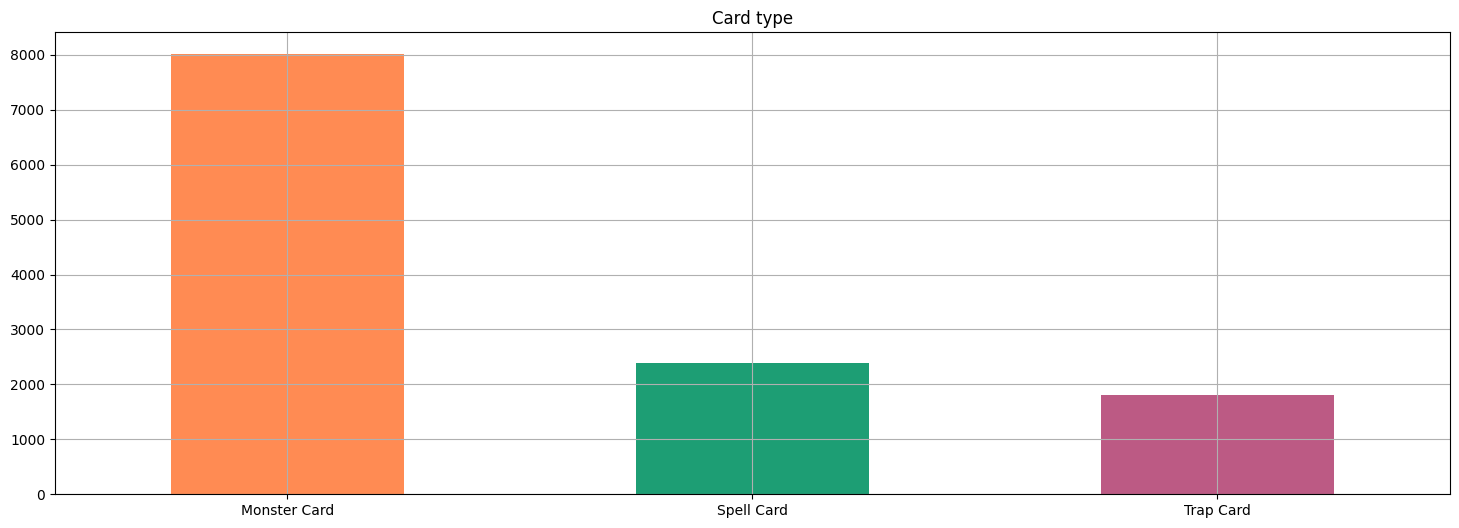

In [9]:
card_type_colors = [card_colors[i] for i in formatted_full_df['Card type'].value_counts().index]
formatted_full_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [10]:
print('Total number of attributes:', formatted_monster_df['Attribute'].nunique())

Total number of attributes: 7


In [11]:
formatted_monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

,Name,Password,Primary type,Secondary type,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Attribute,,,,,,,,,,,,,,,,,,
DARK,2226,2185,7,6,23,14,70,63,12,6,42,154,452,3,3,7,7,2221
DIVINE,6,0,1,0,2,2,3,3,0,0,0,6,3,1,3,2,2,9
EARTH,1881,1860,7,6,23,12,71,60,12,4,29,128,330,3,3,6,6,1876
FIRE,668,664,8,6,22,12,43,40,8,4,22,85,185,3,3,4,6,666
LIGHT,1621,1588,7,6,23,14,58,50,10,5,30,131,384,3,3,6,7,1616
WATER,835,830,7,6,22,11,56,41,9,4,16,92,205,3,3,5,7,835
WIND,764,755,7,6,23,12,46,38,11,4,14,104,213,3,3,7,6,760


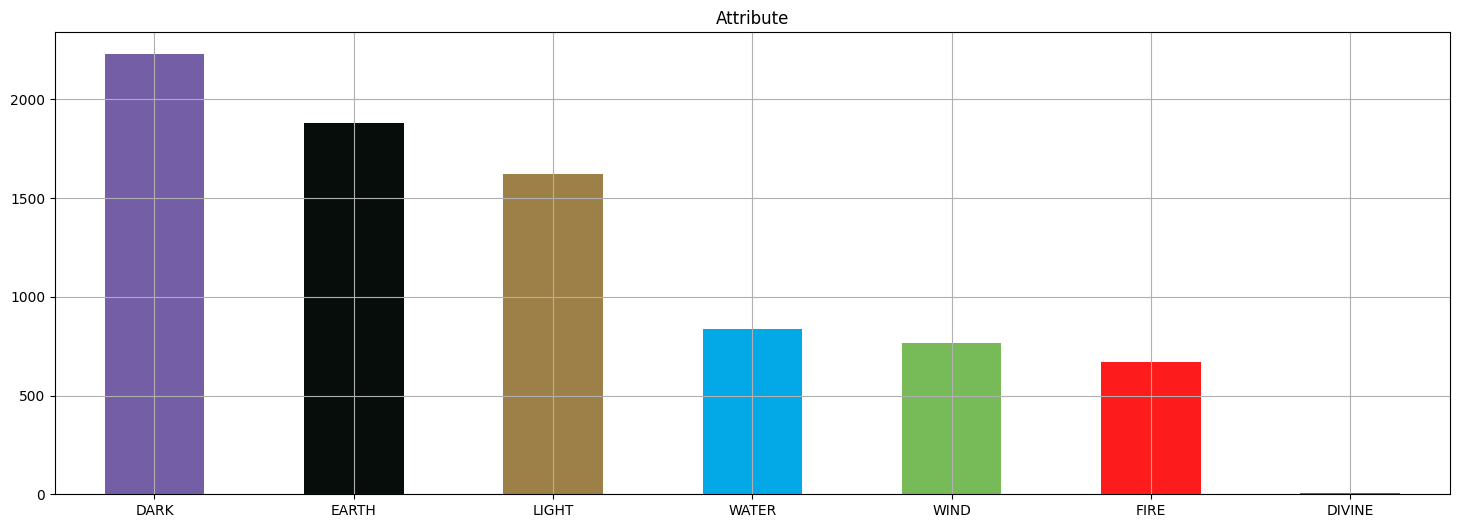

In [12]:
attribute_colors = [card_colors[i] for i in formatted_full_df['Attribute'].value_counts().index]
formatted_monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [13]:
print('Total number of primary types:', formatted_monster_df['Primary type'].nunique())

Total number of primary types: 8


In [14]:
formatted_monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

,Name,Password,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Primary type,,,,,,,,,,,,,,,,,,
Effect Monster,5435,5384,6,7,25,12,73,66,13,0,0,203,776,3,3,6,6,5404
Fusion Monster,428,424,1,6,23,12,48,46,4,0,0,68,141,3,3,4,6,427
Link Monster,371,362,0,6,23,0,38,0,0,6,62,51,138,3,2,5,5,368
Monster Token,1,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,1,1
Normal Monster,745,701,1,6,23,10,59,49,10,0,0,6,129,3,3,4,4,746
Ritual Monster,120,119,3,6,15,12,33,26,1,0,0,33,37,1,3,2,2,120
Synchro Monster,413,408,1,6,23,13,40,38,4,0,0,56,157,2,3,5,5,412
Xyz Monster,492,484,0,6,23,14,51,42,4,0,0,69,191,2,2,6,5,490


#### Has effect discrimination

In [15]:
has_effect = formatted_monster_df['Primary type'].where(formatted_monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = formatted_monster_df['Primary type'].where(formatted_monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

,Effect,No Effect
Effect Monster,5435,0
Xyz Monster,490,2
Synchro Monster,410,3
Fusion Monster,367,61
Link Monster,365,6
Ritual Monster,105,15
Normal Monster,34,712
Monster Token,0,1


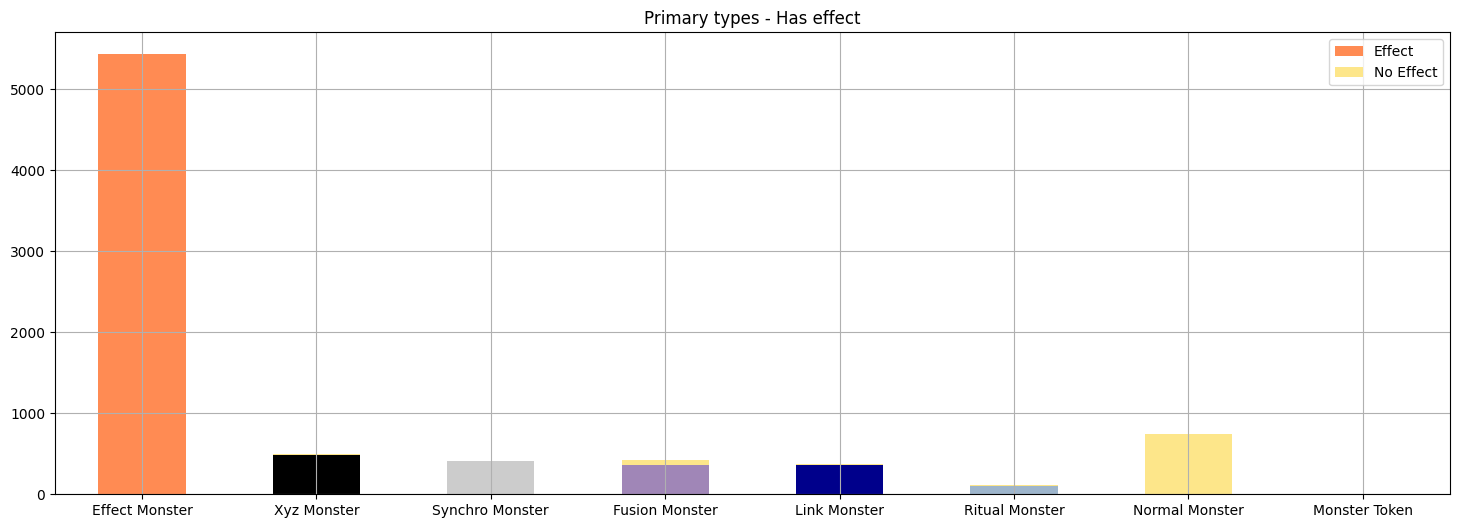

In [16]:
monster_type_colors = {'No Effect': card_colors['Normal Monster'], 'Effect': [card_colors[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [17]:
not_pendulum = formatted_monster_df['Primary type'].where(formatted_monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = formatted_monster_df['Primary type'].where(formatted_monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1).fillna(0).astype(int)
pendulum

,Not Pendulum,Pendulum
Effect Monster,5170,265
Normal Monster,708,38
Xyz Monster,484,8
Fusion Monster,418,10
Synchro Monster,406,7
Link Monster,371,0
Ritual Monster,119,1
Monster Token,1,0


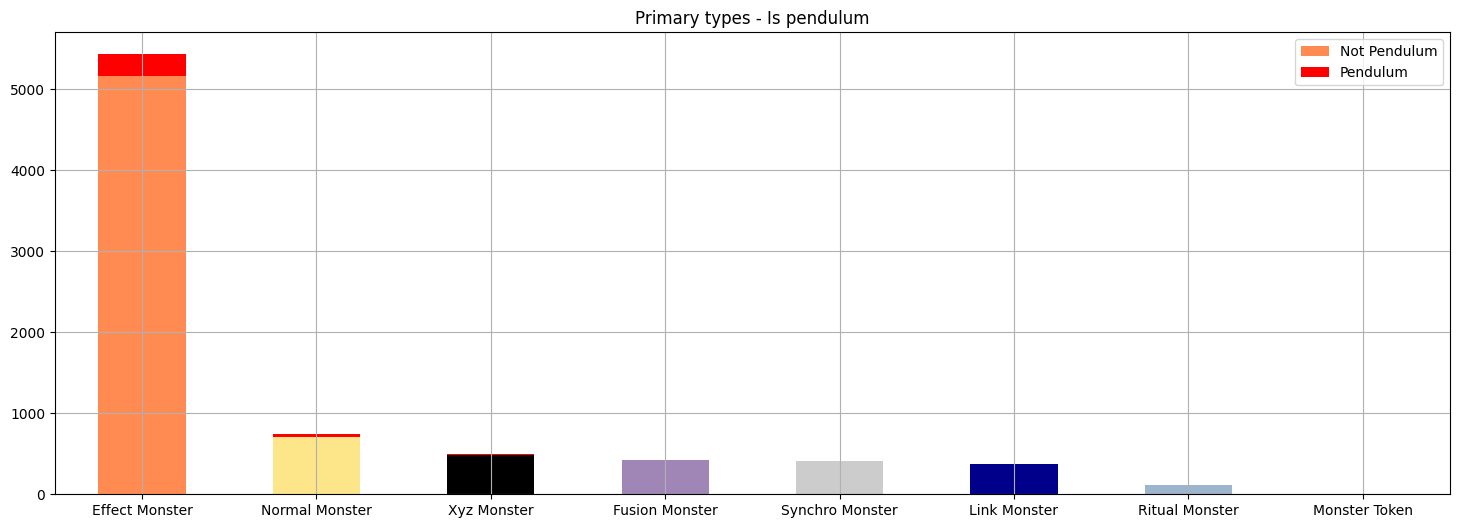

In [18]:
monster_type_colors_b = {'Pendulum': card_colors['Pendulum Monster'], 'Not Pendulum': [card_colors[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [19]:
primmary_crosstab = pd.crosstab(formatted_full_df['Primary type'],formatted_full_df['Attribute'])
primmary_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Primary type,,,,,,,
Effect Monster,1493,6,1307,453,1094,552,530
Fusion Monster,149,0,81,34,97,34,33
Link Monster,122,0,76,33,86,29,25
Monster Token,0,0,0,1,0,0,0
Normal Monster,186,0,250,52,82,109,67
Ritual Monster,36,0,17,7,34,20,6
Synchro Monster,108,0,70,50,75,36,74
Xyz Monster,135,0,82,38,153,55,29


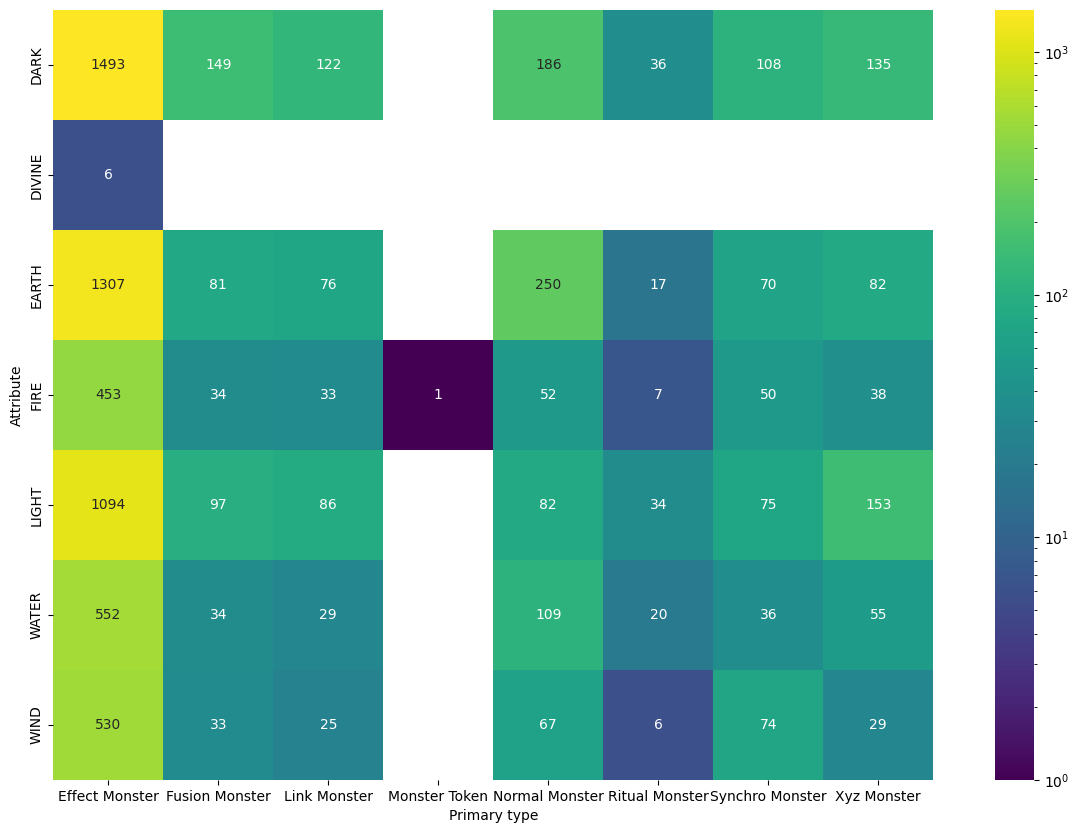

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

### Secondary types

In [21]:
print('Total number of secondary types:', formatted_monster_df['Secondary type'].nunique())

Total number of secondary types: 6


In [22]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

,Name,Password,Primary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Secondary type,,,,,,,,,,,,,,,,
Flip monster,183,182,2,6,19,12,38,33,1,20,45,1,3,3,4,183
Gemini monster,45,45,1,6,18,8,17,19,0,6,13,0,3,1,1,45
Spirit monster,37,37,2,6,13,9,22,20,2,7,4,1,1,2,2,37
Toon monster,17,17,1,6,7,5,12,15,0,8,13,1,2,1,2,17
Tuner monster,476,467,5,6,23,9,32,32,7,58,135,3,3,4,4,475
Union monster,37,37,1,6,9,8,17,14,0,6,9,1,2,1,1,37


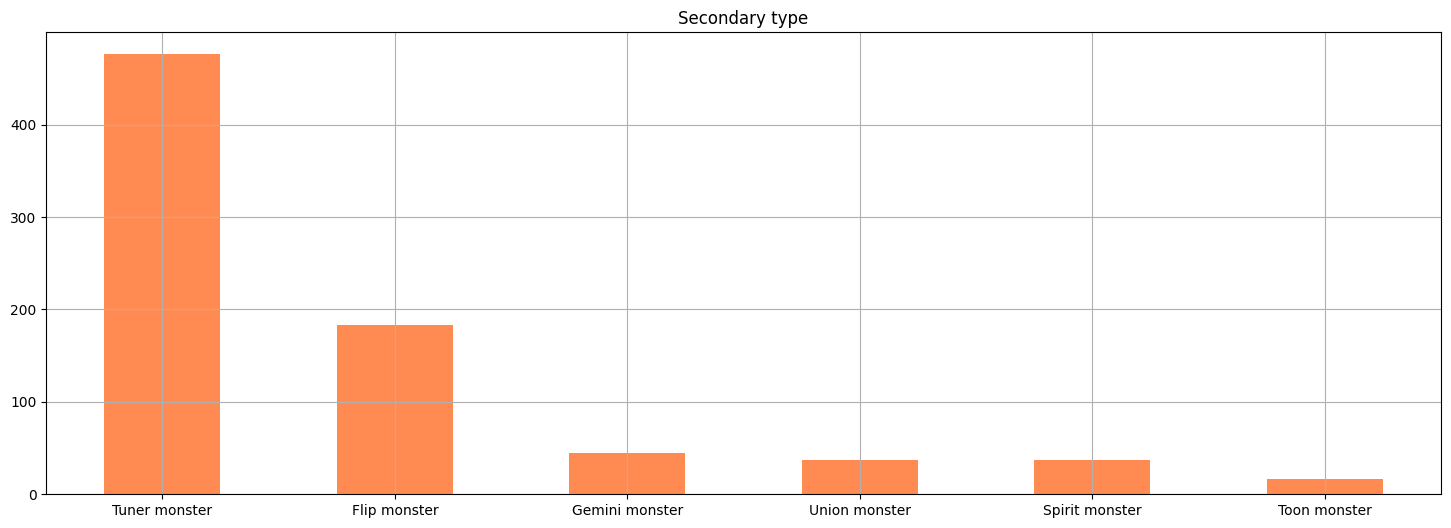

In [23]:
secondary_type_colors = card_colors['Effect Monster']
formatted_monster_df['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [24]:
secondary_crosstab = pd.crosstab(formatted_full_df['Secondary type'],formatted_full_df['Attribute'])
secondary_crosstab

Attribute,DARK,EARTH,FIRE,LIGHT,WATER,WIND
Secondary type,,,,,,
Flip monster,51,61,10,31,13,17
Gemini monster,11,8,8,6,8,4
Spirit monster,5,6,6,4,6,10
Toon monster,7,5,1,2,1,1
Tuner monster,123,93,43,95,52,70
Union monster,6,9,3,12,4,3


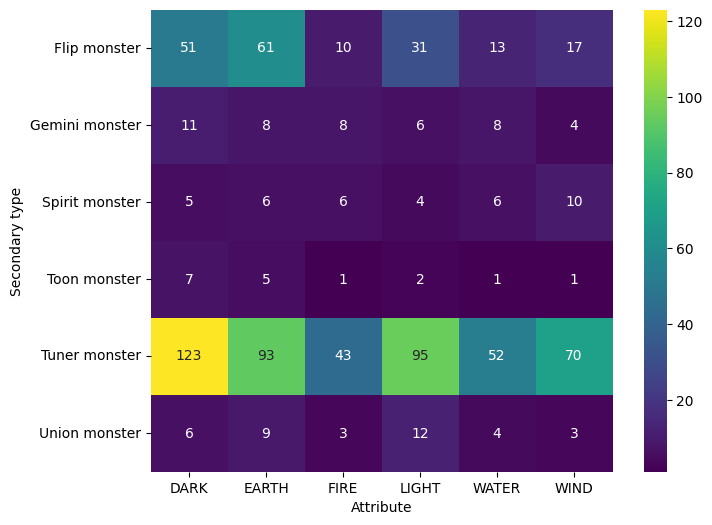

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [26]:
secondary_crosstab_b = pd.crosstab(formatted_full_df['Primary type'],formatted_full_df['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster,All
Primary type,,,,,,,
Effect Monster,182,45,35,17,429,37,745
Fusion Monster,0,0,0,0,3,0,3
Normal Monster,0,0,0,0,12,0,12
Ritual Monster,1,0,2,0,2,0,5
Synchro Monster,0,0,0,0,30,0,30
All,183,45,37,17,476,37,795


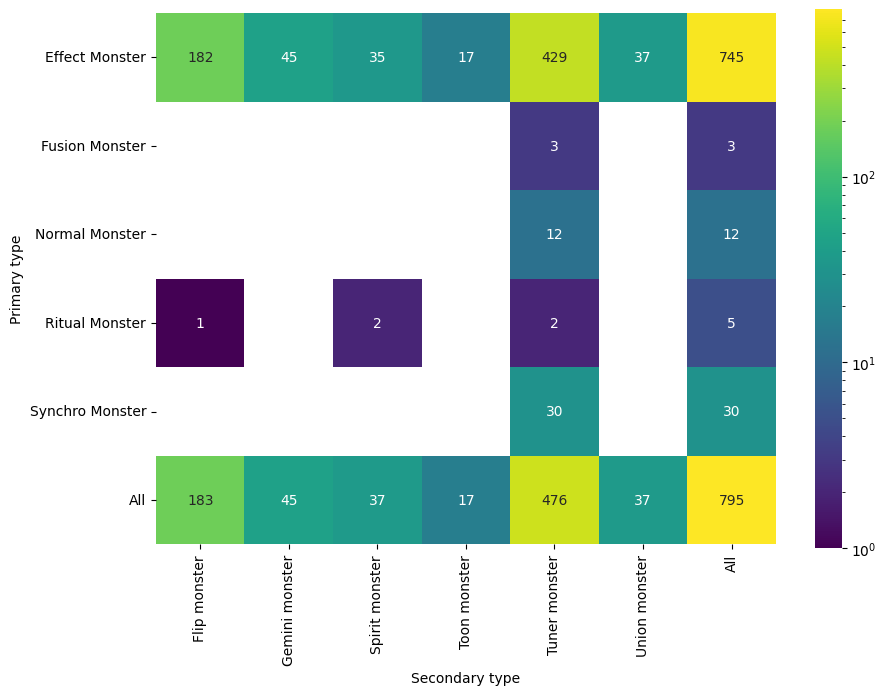

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

### Monster types

In [28]:
print('Total number of monster types:', formatted_monster_df['Monster type'].nunique())

Total number of monster types: 25


In [29]:
formatted_monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Monster type,,,,,,,,,,,,,,,,,,
Aqua,255,253,7,6,6,10,50,33,3,2,3,50,64,1,3,4,5,255
Beast,376,369,7,4,6,10,48,38,7,2,7,59,84,2,3,4,4,377
Beast-Warrior,237,233,7,3,6,10,36,29,6,3,7,57,47,2,3,4,5,236
Creator God,1,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,1,1
Cyberse,254,245,7,1,6,11,30,29,1,6,39,45,36,3,2,5,5,254
Dinosaur,122,121,6,1,6,10,35,30,4,2,3,35,24,1,2,3,3,122
Divine-Beast,5,0,1,0,1,1,3,3,0,0,0,5,2,1,3,2,2,8
Dragon,657,651,7,6,6,13,52,48,9,5,19,108,186,3,3,6,6,655
Fairy,515,502,7,5,6,12,43,38,9,4,12,81,114,3,3,6,6,513


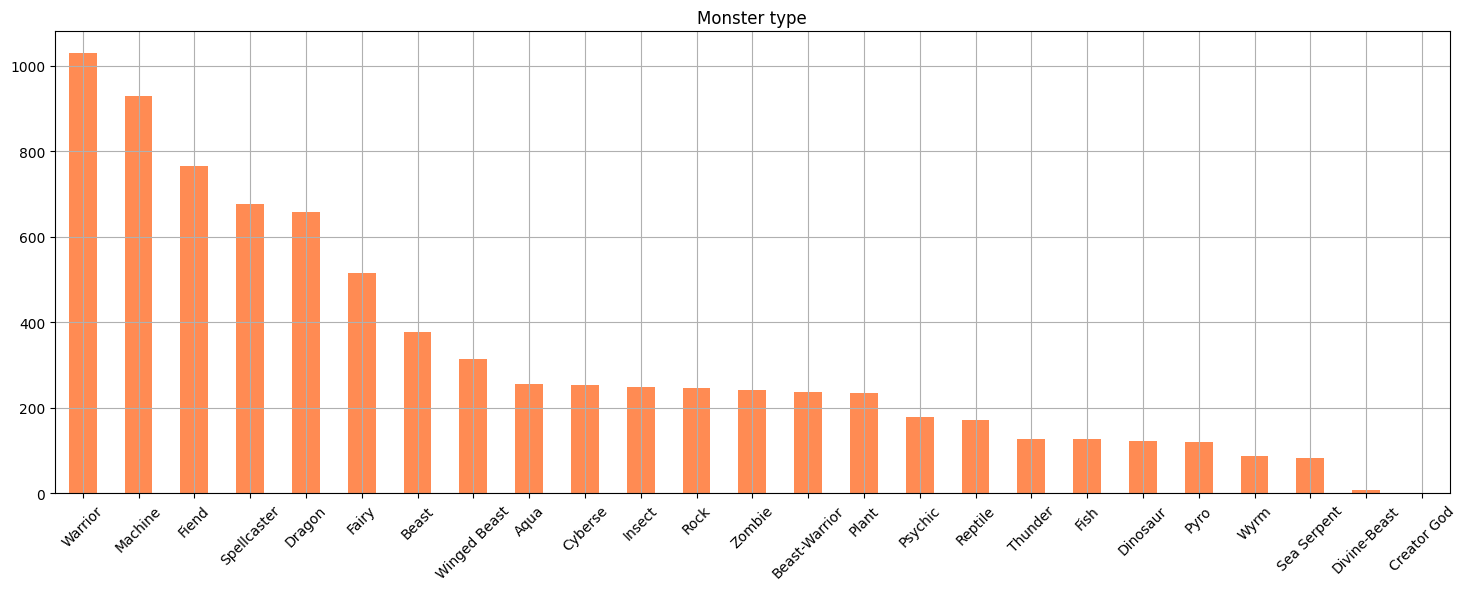

In [30]:
monster_type_colors = card_colors['Monster Card']
formatted_monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [31]:
monster_crosstab = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Attribute'], dropna=False)
monster_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Monster type,,,,,,,
Aqua,9,0,6,10,4,220,6
Beast,37,0,213,16,72,14,25
Beast-Warrior,37,0,82,54,33,16,15
Creator God,0,1,0,0,0,0,0
Cyberse,70,0,37,44,63,28,12
Dinosaur,11,0,60,32,5,8,6
Divine-Beast,0,8,0,0,0,0,0
Dragon,254,0,47,48,167,28,113
Fairy,57,0,63,17,326,27,25


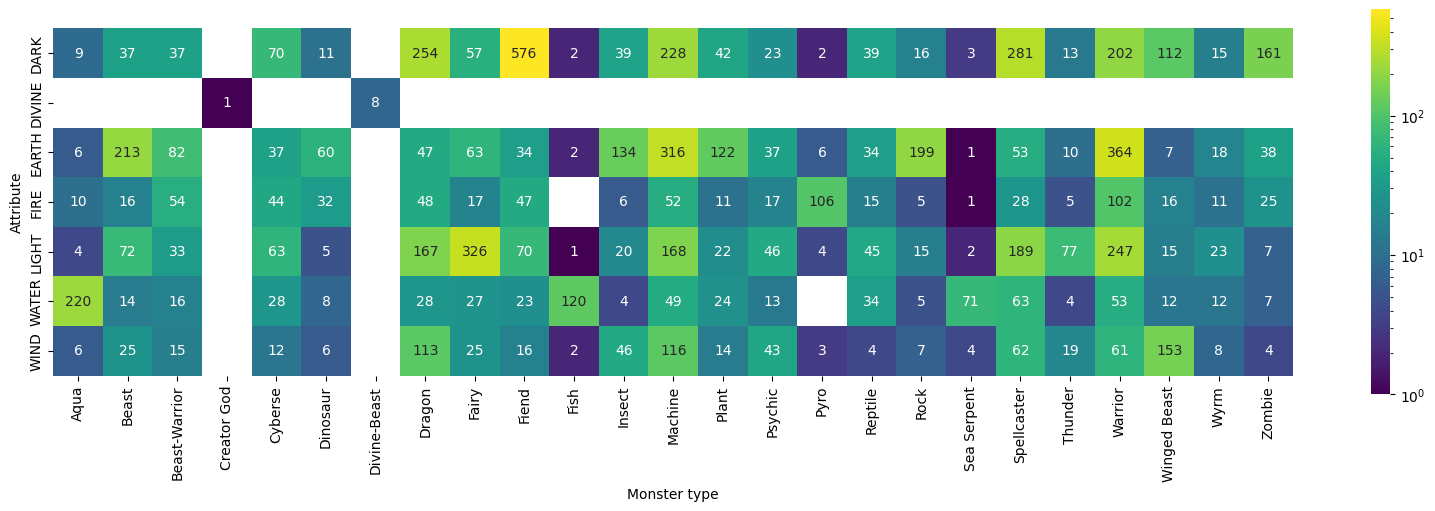

In [32]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

#### By primary type

In [33]:
monster_crosstab_b = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Monster Token,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Monster type,,,,,,,,
Aqua,153,11,3,0,59,8,4,17
Beast,271,17,9,0,54,1,14,11
Beast-Warrior,163,11,9,0,21,2,8,23
Creator God,1,0,0,0,0,0,0,0
Cyberse,125,5,96,0,7,7,5,9
Dinosaur,87,7,3,0,18,0,4,3
Divine-Beast,5,0,0,0,0,0,0,0
Dragon,346,63,33,0,46,15,93,61
Fairy,366,22,24,0,36,17,18,32


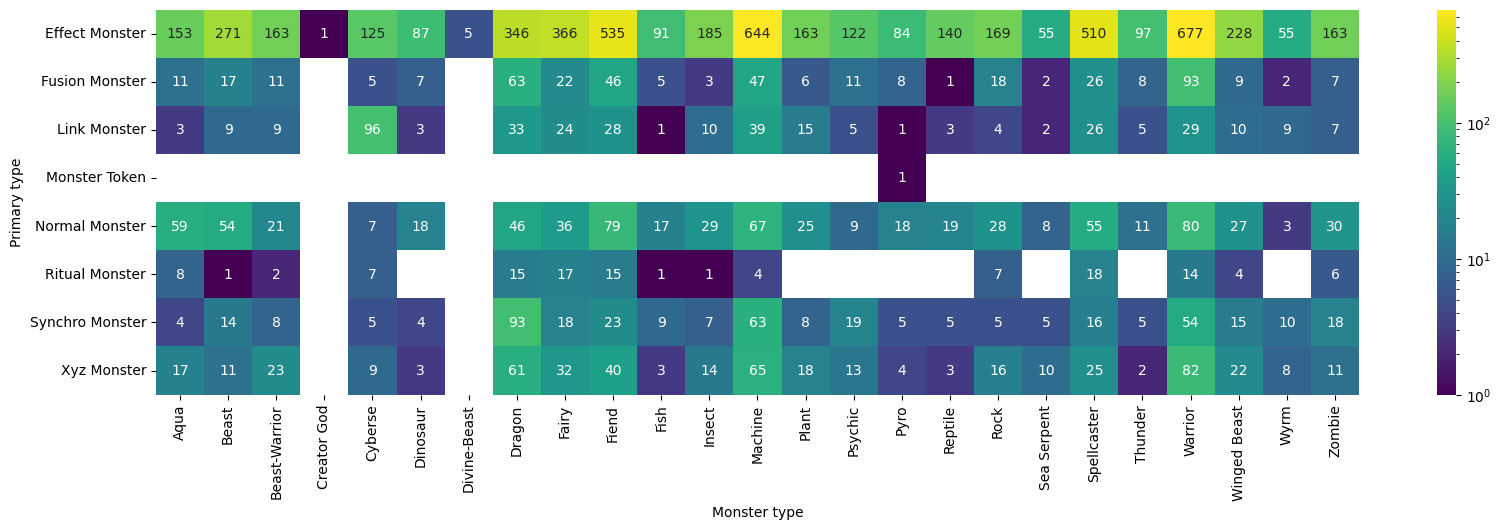

In [34]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = LogNorm())
plt.show()

#### By secondary type

In [35]:
monster_crosstab_c = pd.crosstab(formatted_full_df['Monster type'],formatted_full_df['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster
Monster type,,,,,,
Aqua,4,4,1,1,10,3
Beast,15,1,2,0,22,0
Beast-Warrior,1,0,1,0,9,0
Cyberse,0,0,0,0,7,0
Dinosaur,0,0,0,0,7,0
Dragon,1,6,1,3,42,4
Fairy,8,2,7,0,22,5
Fiend,27,4,2,1,41,1
Fish,0,1,0,0,8,0


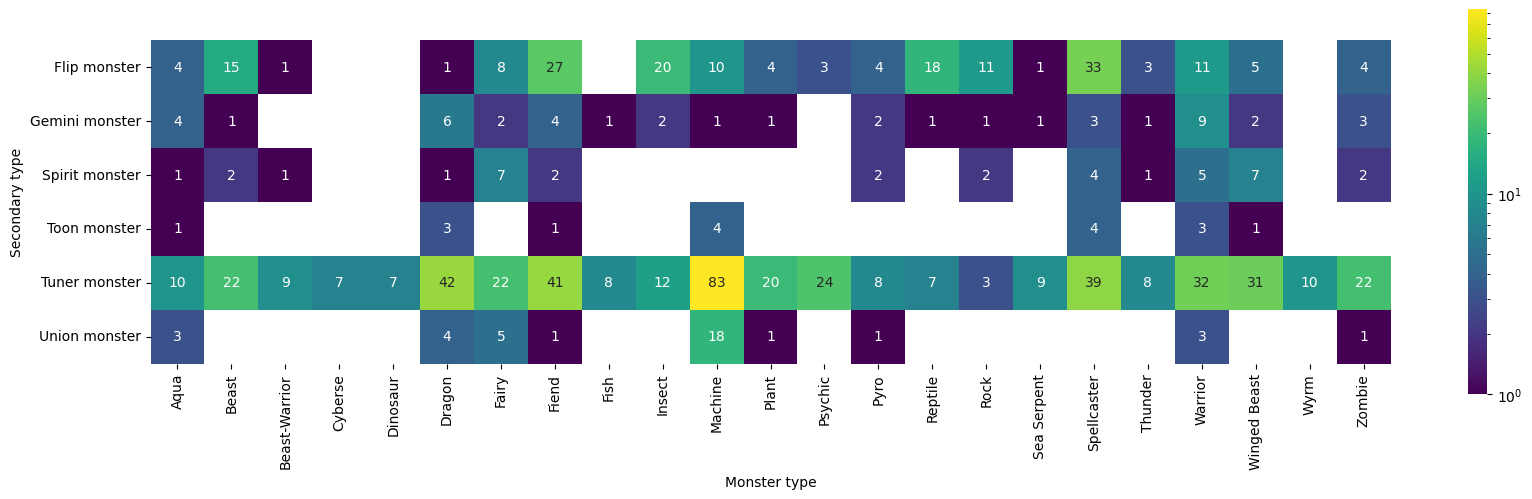

In [36]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = LogNorm())
plt.show()

### Effect type

In [37]:
print('Total number of effect types:', formatted_monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [38]:
formatted_monster_df[formatted_monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Effect type,,,,,,,,,,,,,,,,,,
Activation condition,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1
Condition,3079,3014,7,6,7,25,14,63,63,13,6,54,642,3,3,5,6,3059
Continuous Effect,2152,2138,6,5,7,24,14,59,52,12,6,48,559,3,3,5,4,2148
Continuous-like Effect,235,234,6,3,6,21,11,42,36,13,1,2,72,2,3,3,3,235
Flip effect,169,168,1,1,6,19,12,38,33,1,0,0,43,1,3,3,4,169
Ignition Effect,2606,2581,6,6,7,24,13,66,61,12,5,42,638,3,3,5,6,2597
Ignition-like Effect,222,211,6,2,6,20,12,35,33,13,1,1,75,1,3,3,6,222
Lingering effect,17,17,2,1,6,12,7,12,14,0,2,2,10,0,0,2,2,16
Maintenance cost,44,44,3,0,6,12,8,21,18,2,1,1,8,0,1,1,1,44


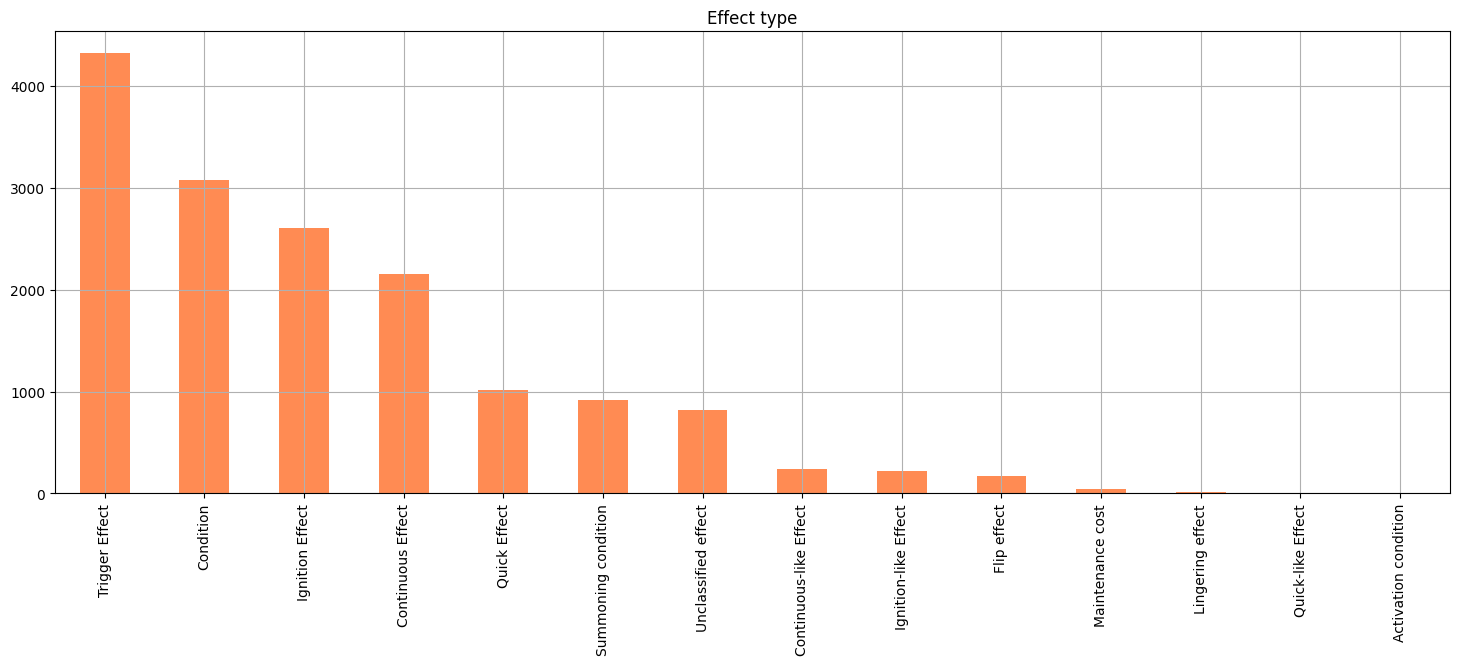

In [39]:
monster_effect_colors = card_colors['Effect Monster']
formatted_monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [40]:
print('Total number of ATK values:', formatted_monster_df['ATK'].nunique())

Total number of ATK values: 82


In [41]:
formatted_monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
ATK,,,,,,,,,,,,,,,,,,
0,621,589,8,5,6,23,13,35,9,5,15,93,235,3,3,7,6,620
50,2,2,1,0,2,2,1,2,0,0,0,2,2,0,0,1,1,2
100,218,217,5,3,6,20,11,27,8,2,2,48,107,2,3,3,3,218
150,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1
200,119,118,6,5,6,20,7,21,4,1,2,35,68,1,3,2,3,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,12,12,3,0,3,6,4,4,0,0,0,10,9,1,1,1,1,12
4600,2,2,1,0,2,1,1,1,0,0,0,2,1,1,0,1,1,2
5000,9,9,5,0,3,4,2,4,0,1,1,8,6,1,1,1,1,9


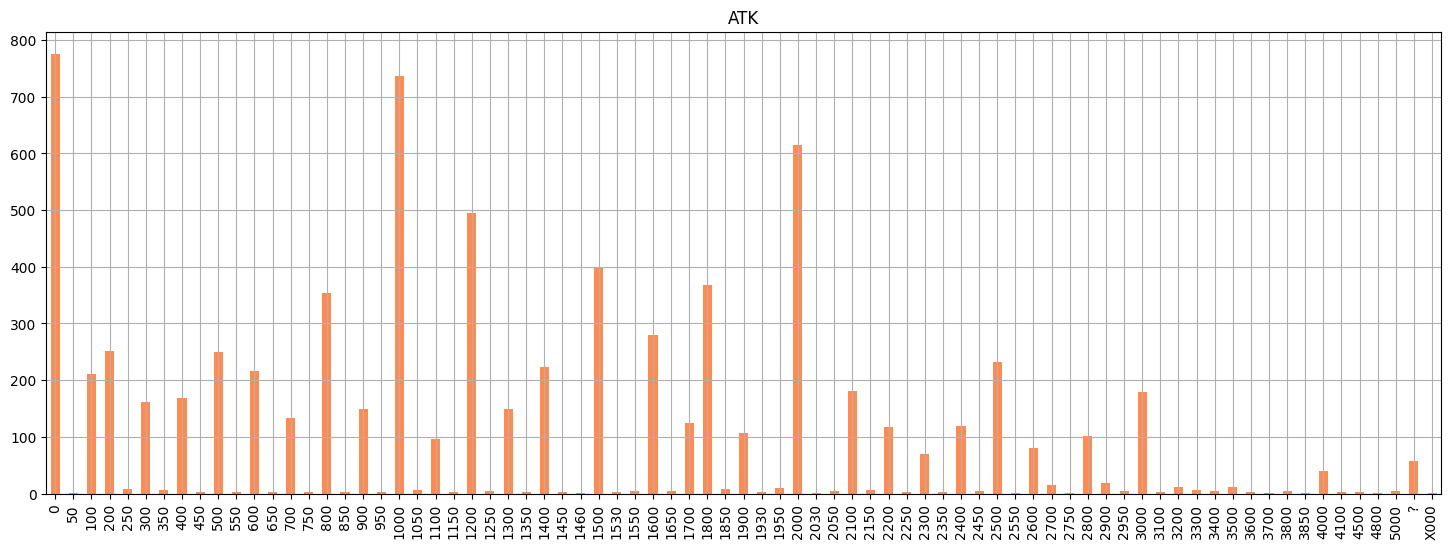

In [42]:
atk_colors = card_colors['Monster Card']
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [43]:
print('Total number of DEF values:', formatted_monster_df['DEF'].nunique())

Total number of DEF values: 77


In [44]:
formatted_monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
DEF,,,,,,,,,,,,,,,,,,
0,776,745,7,6,6,23,14,45,10,0,0,104,259,2,3,6,5,773
50,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1
100,210,209,5,4,6,19,10,24,8,0,0,47,95,2,3,3,4,209
200,252,248,5,5,6,23,10,31,5,0,0,48,109,2,3,3,5,252
250,8,8,2,1,4,5,2,4,0,0,0,5,3,0,1,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,2,2,2,0,2,2,1,1,0,0,0,2,1,0,0,1,1,2
4800,1,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1
5000,5,5,2,0,3,3,2,2,0,0,0,4,3,1,1,1,1,5


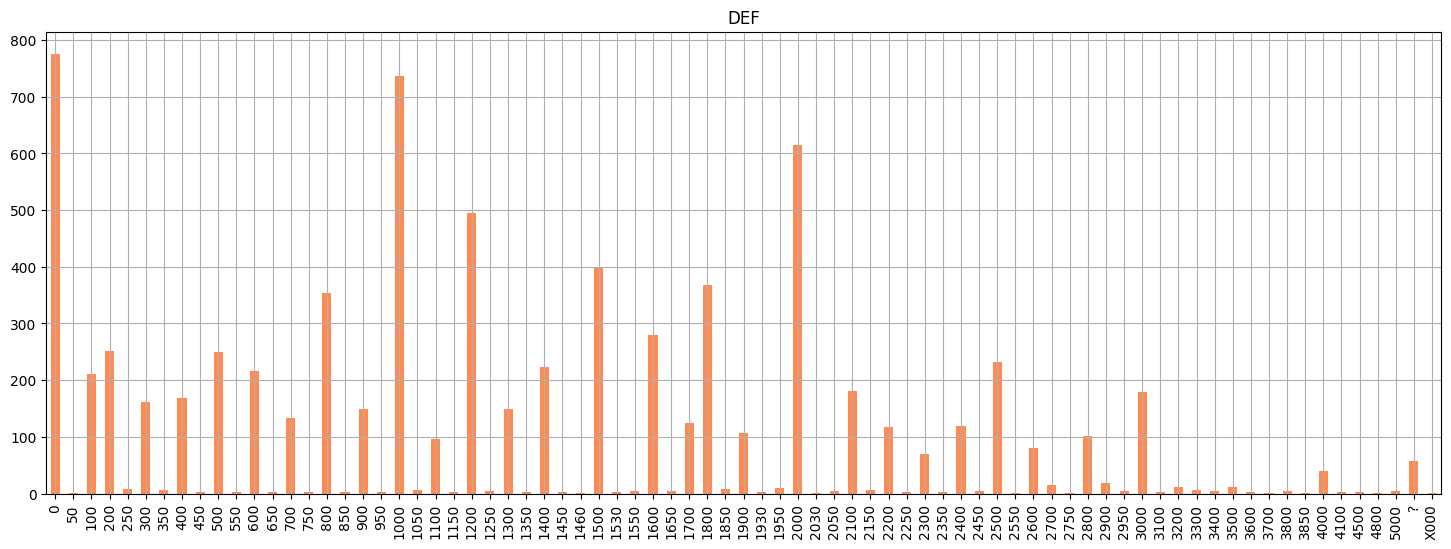

In [45]:
def_colors = card_colors['Monster Card']
formatted_monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [46]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,ATK,DEF,Pendulum Scale,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Level/Rank,,,,,,,,,,,,,,,,
0,6,6,2,0,2,2,3,3,0,5,3,0,0,2,2,6
1,632,603,7,5,6,23,22,29,10,80,227,2,3,5,5,630
2,677,666,6,5,6,23,29,30,7,74,214,2,3,4,6,676
3,1148,1141,6,5,6,23,41,36,9,93,292,3,3,5,7,1148
4,2340,2326,6,6,6,23,54,47,9,134,507,3,3,5,7,2333
5,597,593,6,6,6,23,46,38,8,84,239,2,3,3,4,597
6,609,605,6,6,6,23,38,38,9,92,234,3,3,6,6,610
7,468,462,6,6,6,23,38,35,9,100,226,2,3,5,6,470
8,677,660,6,5,6,23,42,41,8,111,299,3,3,5,6,678


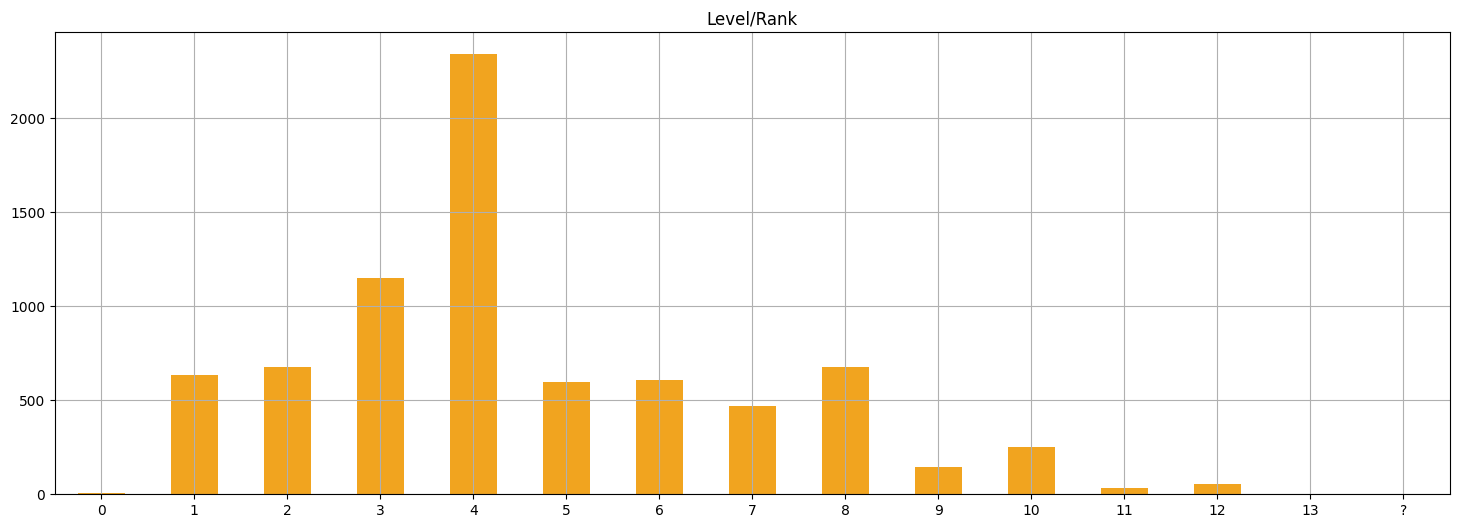

In [47]:
stars_colors = card_colors['Level']
formatted_monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [48]:
formatted_monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            622.0   239.147910   351.198198  0.0     0.0   100.0   300.0   
2            675.0   580.370370   409.199492  0.0   300.0   500.0   800.0   
3           1145.0   957.423581   486.299984  0.0   600.0  1000.0  1300.0   
4           2328.0  1417.796392   540.597322  0.0  1200.0  1500.0  1800.0   
5            594.0  1762.070707   642.211547  0.0  1500.0  1900.0  2200.0   
6            606.0  2014.603960   612.457797  0.0  1900.0  2200.0  2400.0   
7            464.0  2286.314655   619.709745  0.0  2200.0  2500.0  2600.0   
8            669.0  2546.263079   706.715708  0.0  2500.0  2800.0  3000.0   
9            140.0  2601.785714   842.196740  0.0  2500.0  2800.0  3000.0   
10           227.0  2813.436123  1226.029493  0.0  2800.0  3000.0  3500.0   
11            30.0  2990.000000  1093.113238  0.0  3000.0  3350.0  3500.0   
12            49.0  3328.571429  1385.790990  0.0  3000.0  4000.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [49]:
formatted_monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            624.0   336.778846   518.019480  0.0     0.0   100.0   400.0   
2            676.0   663.757396   558.121261  0.0   200.0   500.0   900.0   
3           1145.0   953.537118   572.576357  0.0   600.0   900.0  1300.0   
4           2330.0  1168.639485   608.345562  0.0   800.0  1200.0  1600.0   
5            595.0  1424.705882   675.032888  0.0  1000.0  1500.0  1900.0   
6            606.0  1552.854785   711.322783  0.0  1200.0  1600.0  2000.0   
7            466.0  1887.982833   653.687150  0.0  1600.0  2000.0  2300.0   
8            676.0  1982.248521   847.879256  0.0  1600.0  2100.0  2500.0   
9            140.0  2314.642857   789.647413  0.0  2000.0  2500.0  2925.0   
10           236.0  2221.398305  1283.685583  0.0  1800.0  2500.0  3000.0   
11            30.0  2661.666667  1169.415071  0.0  2125.0  3000.0  3400.0   
12            50.0  2904.000000  1618.510275  0.0  2000.0  3350.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [50]:
formatted_monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Pendulum Scale,,,,,,,,,,,,,,,,
0,10,10,2,1,5,7,6,5,5,8,8,1,0,1,1,10
1,70,65,5,2,6,10,11,28,27,38,39,1,1,3,5,70
2,36,36,2,1,6,11,6,17,22,21,15,1,2,3,2,36
3,36,36,2,1,6,15,8,22,15,23,17,0,0,1,1,36
4,33,32,5,0,5,8,8,18,16,25,17,1,1,1,2,33
5,34,34,2,1,6,12,7,23,21,20,16,0,1,3,3,34
6,15,15,1,1,4,7,6,11,11,11,9,0,0,1,1,15
7,27,27,2,1,6,14,6,19,17,14,16,1,2,1,1,27
8,41,40,5,1,6,9,8,19,18,23,21,0,0,1,4,41


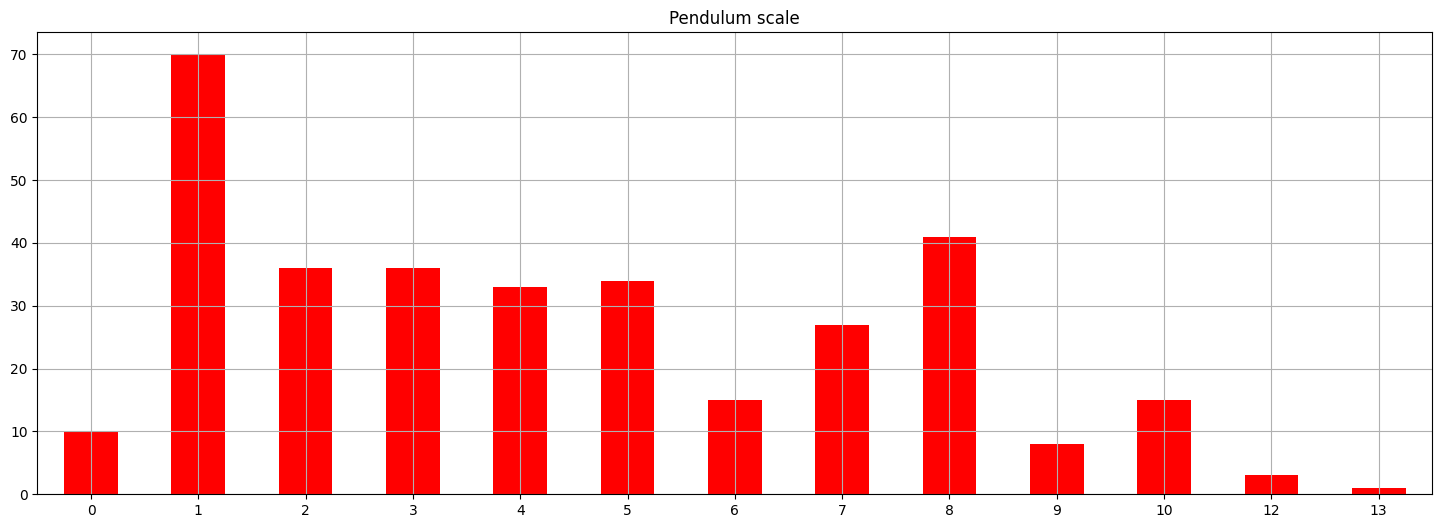

In [51]:
scales_colors = card_colors['Pendulum Monster']
formatted_monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [52]:
formatted_monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               10.0  1390.000000  1317.784336     0.0     0.0  1450.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               36.0  1437.500000   845.354955     0.0   600.0  1725.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               41.0  1226.829268   945.786548     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2025.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               2000.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [53]:
formatted_monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               10.0  1200.000000  1273.664878     0.0     0.0   750.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               36.0  1165.277778   788.834533     0.0   575.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               41.0  1039.024390   777.135139     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1700.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [54]:
formatted_monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    10.0  6.100000  3.348300  1.0  3.75   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    36.0  4.444444  1.731134  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    41.0  3.926829  2.295542  1.0  2.00   4.0   6.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [55]:
formatted_monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Attribute,Monster type,ATK,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Link,,,,,,,,,,,,,
1,47,47,6,11,10,8,17,26,1,0,3,3,47
2,186,185,6,23,24,19,31,102,3,2,2,4,184
3,83,82,6,16,17,17,25,47,2,1,2,3,83
4,44,41,6,16,12,13,21,24,3,0,3,4,44
5,9,6,2,5,4,3,6,5,0,0,3,2,9
6,2,1,1,1,2,2,2,2,0,0,1,2,2


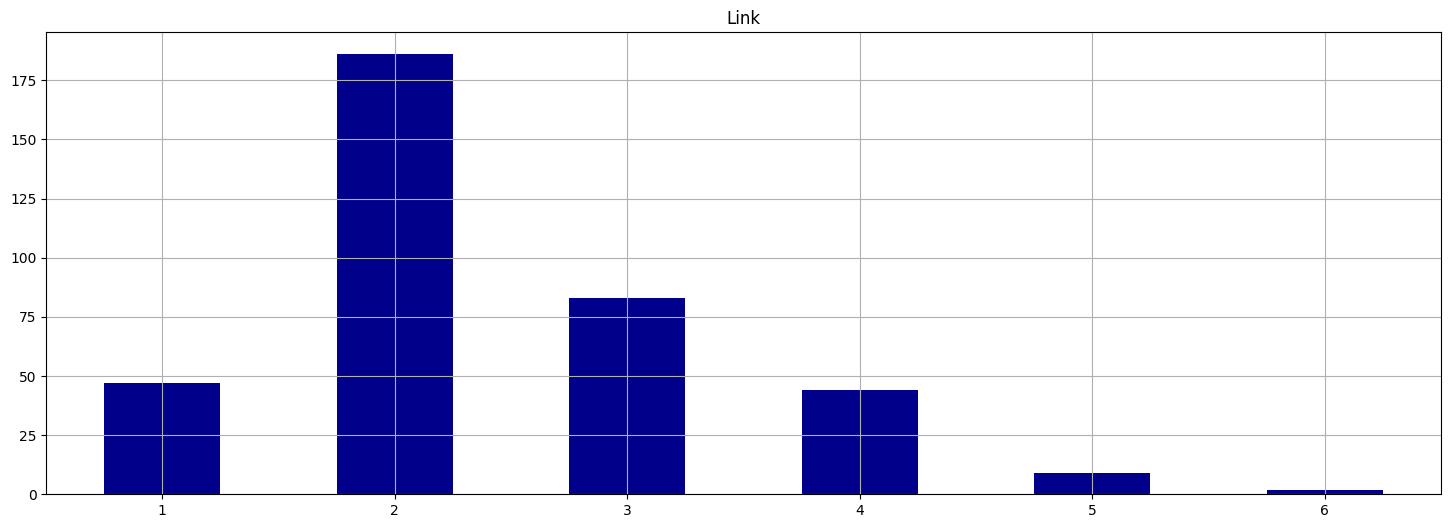

In [56]:
link_colors = card_colors['Link Monster']
formatted_monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [57]:
formatted_monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      47.0   736.170213   482.937358     0.0   400.0   800.0  1000.0  1500.0
2     186.0  1405.645161   508.849113     0.0  1100.0  1500.0  1800.0  2300.0
3      83.0  2253.614458   653.358263     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [58]:
print('Total number of link arrow combinations:', formatted_monster_df['Link Arrows'].nunique())

Total number of link arrow combinations: 62


In [59]:
formatted_monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Link Arrows,,,,,,,,,,,,
"(←,)",5,5,2,3,2,4,4,0,0,3,2,5
"(←, ↑)",4,4,2,3,4,3,2,0,0,1,1,4
"(←, →)",18,18,6,8,11,8,9,1,0,2,2,18
"(←, →, ↑)",8,7,4,5,6,7,5,0,0,1,2,8
"(↑,)",10,10,5,5,6,9,5,0,0,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
"(↙, ↘, ←, ↖)",1,1,1,1,1,1,1,0,0,1,1,1
"(↙, ↘, ↑)",22,22,6,11,11,11,15,2,1,2,2,22
"(↙, ↘, →)",2,2,2,2,2,2,2,0,0,1,1,2


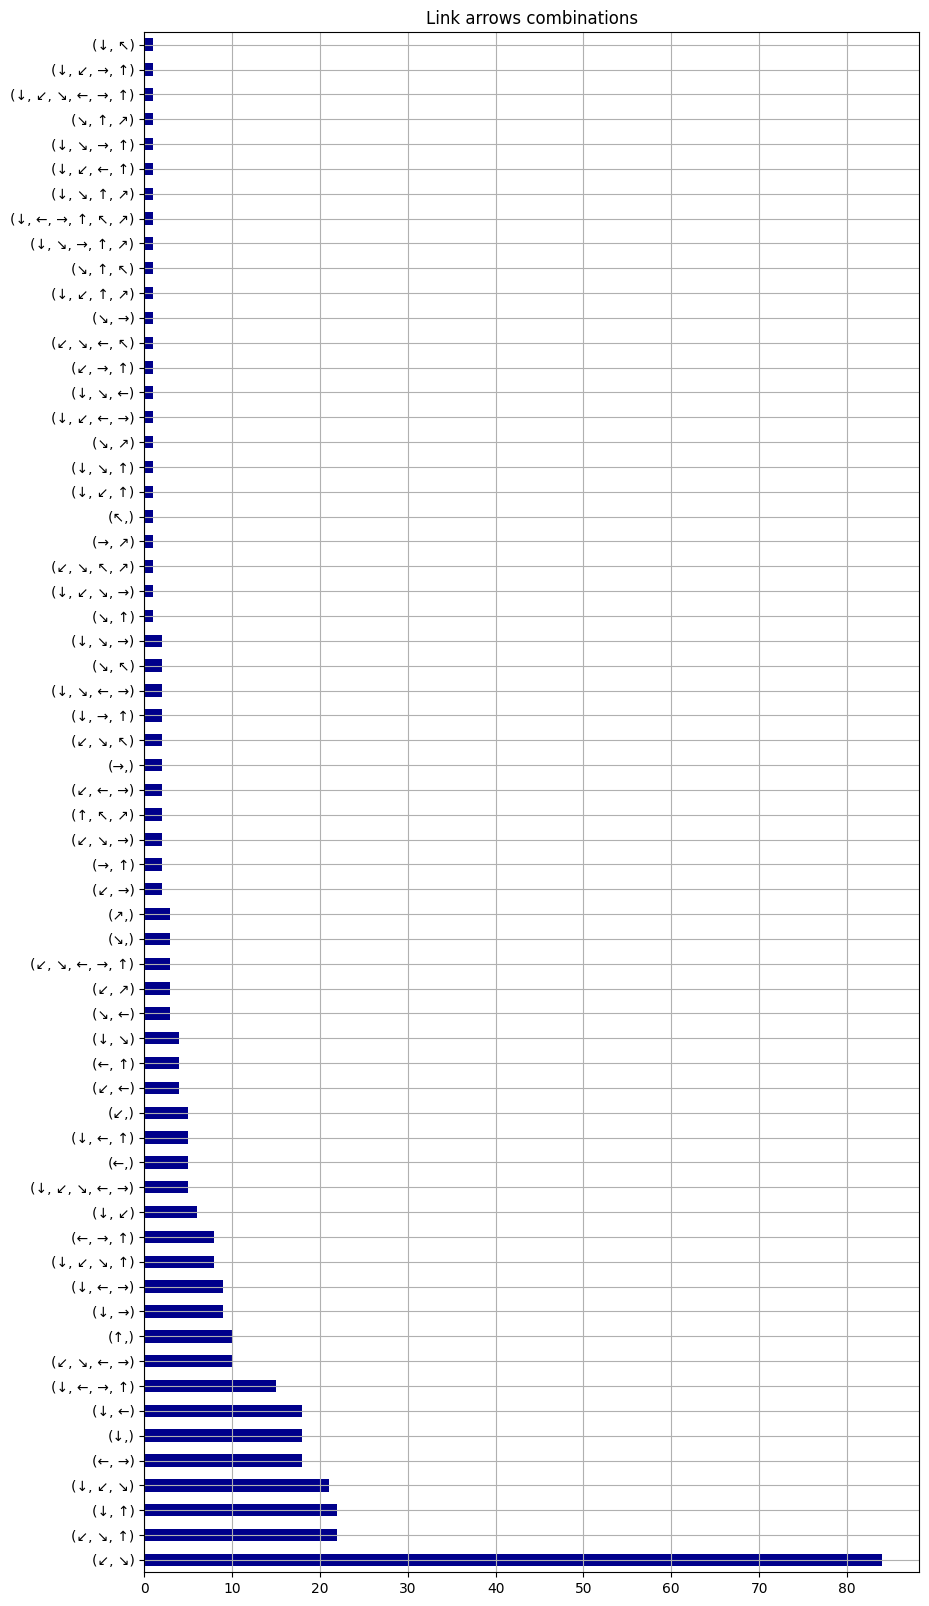

In [60]:
arrows_colors = card_colors['Link Monster']
formatted_monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [61]:
formatted_monster_df[formatted_monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Link,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Link Arrows,,,,,,,,,,,,,
←,117,109,6,21,29,6,35,46,3,0,5,4,117
↑,117,112,6,19,27,6,31,44,3,1,4,5,117
→,103,95,6,19,27,6,30,40,2,0,4,4,103
↓,160,153,6,20,31,6,41,68,3,0,3,5,159
↖,12,10,5,5,10,5,6,6,2,0,1,3,12
↗,16,15,5,7,11,6,7,8,2,0,1,3,16
↘,187,183,6,22,32,6,35,103,3,2,4,5,186
↙,189,186,6,22,33,6,37,104,3,2,4,4,188


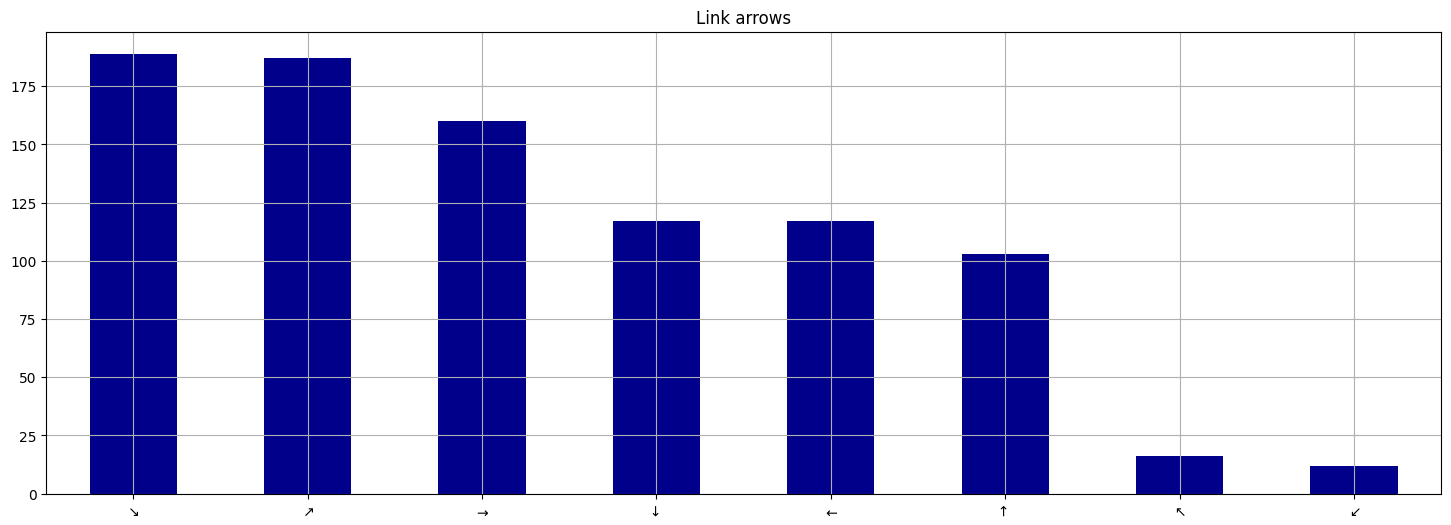

In [62]:
arrows_colors_b = card_colors['Link Monster']
formatted_monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [63]:
arrow_per_link = formatted_monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

Link,1,2,3,4,5,6
Link Arrows,,,,,,
←,5,47,25,30,8,2
↑,10,29,44,28,4,2
→,2,33,26,31,9,2
↓,18,60,42,32,6,2
↖,1,3,5,2,0,1
↗,3,5,3,3,1,1
↘,3,96,53,25,9,1
↙,5,99,51,25,8,1


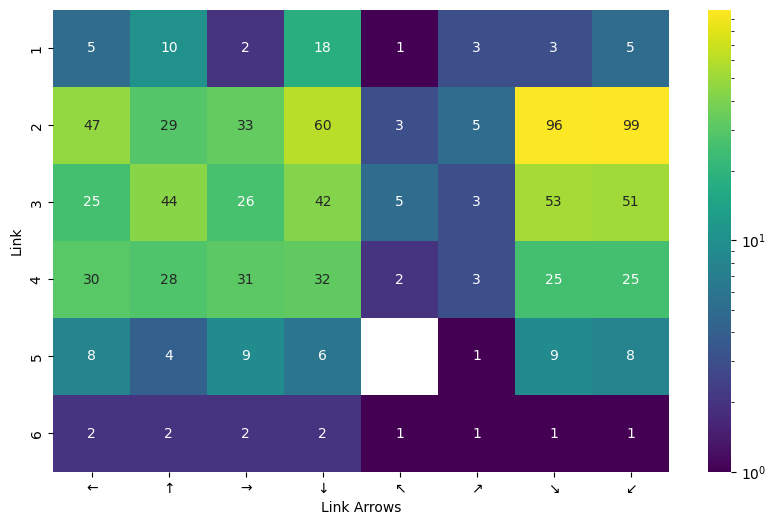

In [64]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

## Spell & Trap

### Properties

In [65]:
print('Total number of properties:', formatted_st_df['Property'].nunique())

Total number of properties: 9


In [66]:
formatted_st_df.drop(columns=['Card type']).groupby('Property').nunique()

,Name,Password,Effect type,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Property,,,,,,,,,
Continuous Spell Card,418,417,54,159,2,3,5,4,414
Continuous Trap Card,491,482,64,162,1,3,3,3,490
Counter Trap Card,156,152,19,59,1,2,2,3,156
Equip Spell Card,264,262,38,74,1,3,3,3,264
Field Spell Card,274,270,35,143,1,3,5,4,275
Normal Spell Card,918,913,43,230,3,3,5,6,918
Normal Trap Card,1167,1162,48,240,2,2,6,6,1163
Quick-Play Spell Card,430,420,35,139,1,3,3,4,429
Ritual Spell Card,75,75,8,25,1,2,1,1,75


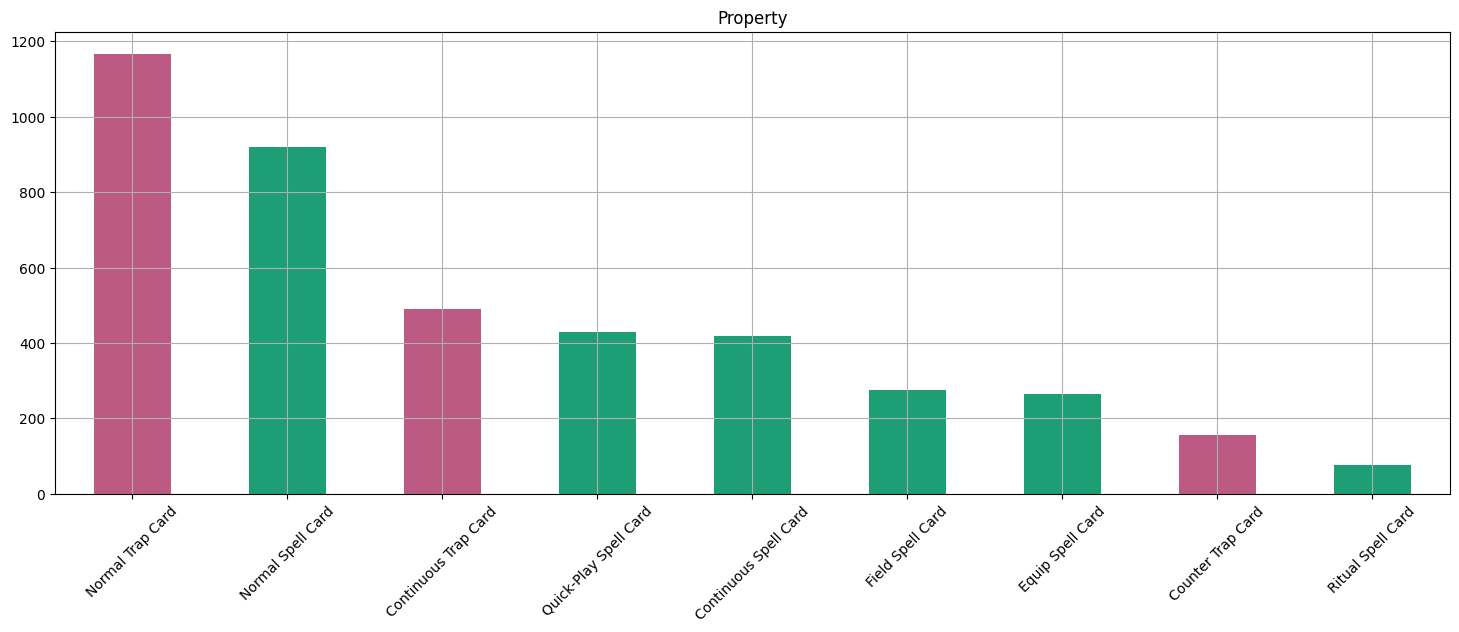

In [67]:
st_colors = [card_colors[i] for i in formatted_full_df[['Card type','Property']].value_counts().index.get_level_values(0)]
formatted_st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()

### Effect type

In [68]:
print('Total number of effect types:', formatted_st_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [69]:
formatted_st_df.explode('Effect type').groupby('Effect type').nunique()

,Name,Password,Card type,Property,Archseries,Artwork,Errata,TCG status,OCG status,Modification date
Effect type,,,,,,,,,,
Activation condition,835,828,2,8,171,2,3,5,5,834
Condition,1682,1653,2,9,372,2,3,6,5,1667
Continuous Effect,21,21,2,6,12,1,2,1,1,21
Continuous-like Effect,899,889,2,7,235,2,3,5,5,898
Cost,452,450,2,7,112,2,3,5,4,452
Effect,2939,2907,2,9,429,3,3,6,6,2926
Ignition Effect,2,2,2,2,2,0,0,1,1,2
Ignition-like Effect,439,432,1,6,181,2,2,4,5,437
Lingering effect,95,93,2,7,43,1,2,4,4,95


#### Spell & Trap discrimination

In [70]:
spell = formatted_spell_df['Effect type'].explode('Effect type').value_counts().rename('Spell Card')
trap = formatted_trap_df['Effect type'].explode('Effect type').value_counts().rename('Trap Card')
st_diff = pd.concat([spell, trap], axis = 1).fillna(0).astype(int)
st_diff

,Spell Card,Trap Card
Effect,1532,1408
Condition,1141,542
Continuous-like Effect,617,283
Trigger Effect,568,276
Ignition-like Effect,439,0
Activation condition,245,590
Cost,241,211
Unclassified effect,64,22
Lingering effect,57,38
Maintenance cost,11,11


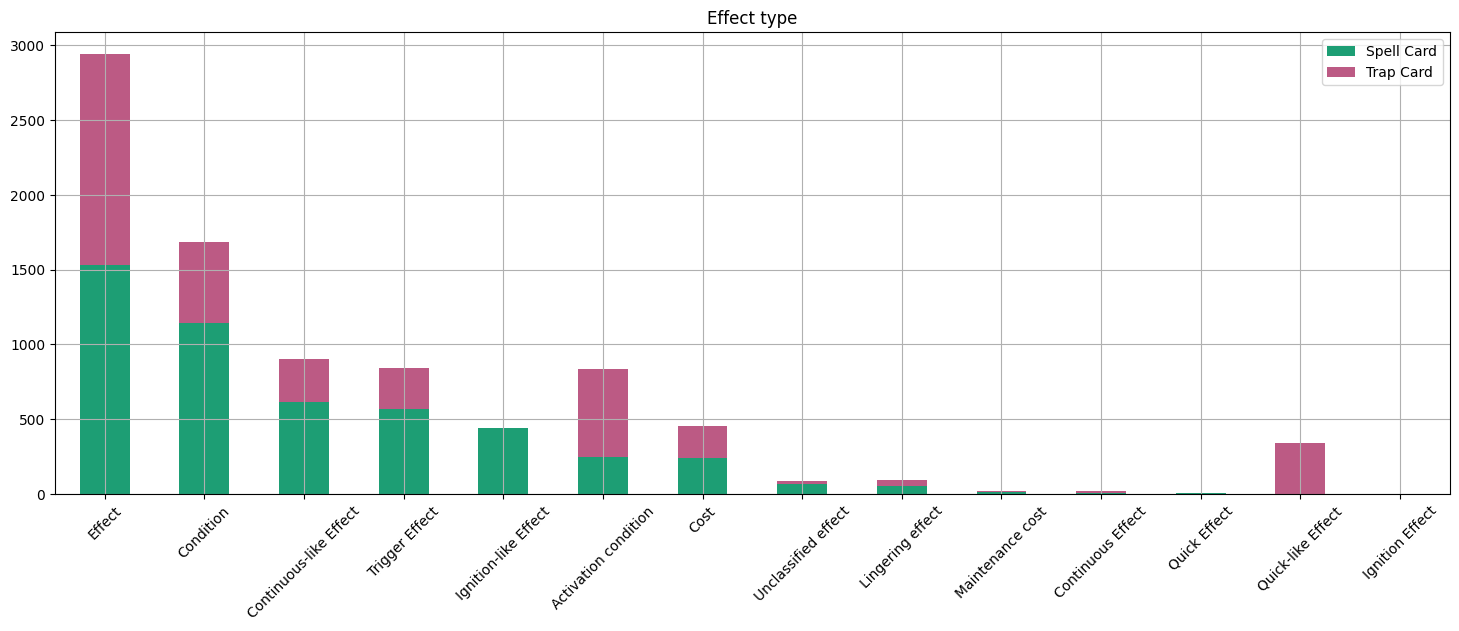

In [71]:
st_diff_colors = {'Spell Card': card_colors['Spell Card'], 'Trap Card': card_colors['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors, title = 'Effect type')
plt.show()

## Archseries

In [72]:
exploded_archseries = formatted_full_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

Total number of Archseries: 711


In [73]:
exploded_archseries.groupby('Archseries').nunique()

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Artwork,Errata,TCG status,OCG status,Modification date
Archseries,,,,,,,,,,,,,,,,,,,,
"""C""",9,9,1,0,2,0,1,1,8,9,8,0,0,0,7,0,1,2,1,9
-Eyes Dragon,73,72,1,0,7,2,6,3,10,16,13,6,1,1,44,1,3,2,3,73
/Assault Mode,7,7,1,0,1,0,5,6,5,6,6,0,0,0,5,0,0,1,1,7
@Ignister,18,18,1,0,6,1,6,1,7,10,9,0,3,4,9,0,0,1,1,18
A-to-Z,16,16,1,0,3,1,1,1,4,13,12,0,0,0,5,2,3,1,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sphinx,10,10,2,1,1,0,2,2,4,8,5,0,0,0,9,0,0,1,1,10
sprout,2,2,1,0,1,0,1,1,1,1,1,0,0,0,2,0,0,1,1,2
tellarknight,21,21,2,3,2,0,2,3,2,16,14,2,0,0,11,0,0,1,2,21


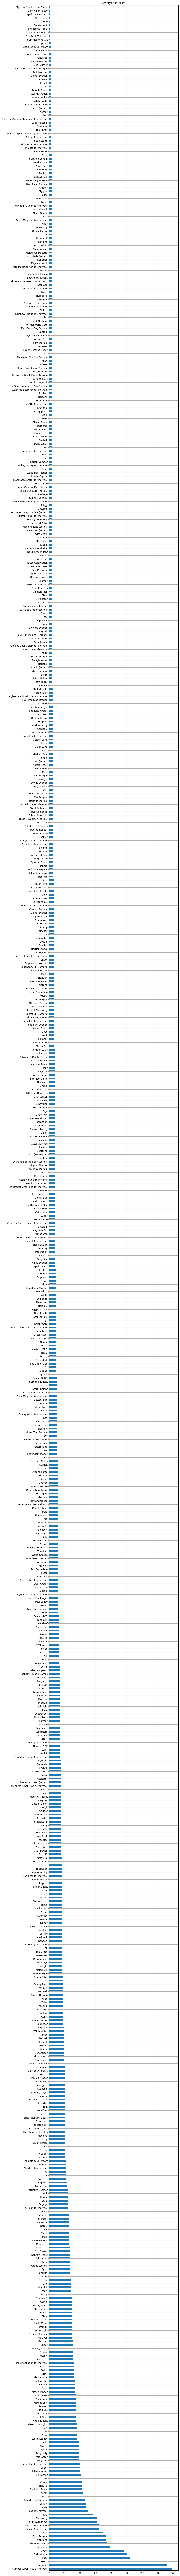

In [74]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [75]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

Card type,Monster Card,Spell Card,Trap Card,All
Archseries,,,,
"""C""",9,0,0,9
-Eyes Dragon,73,0,0,73
/Assault Mode,7,0,0,7
@Ignister,18,0,0,18
A-to-Z,16,0,0,16
...,...,...,...,...
sprout,2,0,0,2
tellarknight,17,4,0,21
with Chain,0,0,4,4


### By primary type

In [76]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Monster Token,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster,All
Archseries,,,,,,,,,
"""C""",8,0,0,0,1,0,0,0,9
-Eyes Dragon,31,11,1,0,3,4,5,18,73
/Assault Mode,7,0,0,0,0,0,0,0,7
@Ignister,10,1,4,0,0,1,1,1,18
A-to-Z,6,8,0,0,2,0,0,0,16
...,...,...,...,...,...,...,...,...,...
sphinx,9,0,0,0,0,0,0,0,9
sprout,2,0,0,0,0,0,0,0,2
tellarknight,12,0,0,0,0,0,0,5,17




### By secondary type

In [77]:
archseries_crosstab_c = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Secondary type'], margins = True)
archseries_crosstab_c

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster,All
Archseries,,,,,,,
-Eyes Dragon,0,2,0,2,0,0,4
@Ignister,0,0,0,0,1,0,1
A-to-Z,0,0,0,0,0,6,6
Adamancipator,0,0,0,0,3,0,3
Alien,1,1,0,0,1,0,3
...,...,...,...,...,...,...,...
itsu,0,0,0,0,0,2,2
lswarm,2,0,0,0,0,0,2
roid,0,0,0,0,9,0,9


### By monster type

In [78]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

Monster type,Aqua,Beast,Beast-Warrior,Creator God,Cyberse,Dinosaur,Divine-Beast,Dragon,Fairy,Fiend,...,Reptile,Rock,Sea Serpent,Spellcaster,Thunder,Warrior,Winged Beast,Wyrm,Zombie,All
Archseries,,,,,,,,,,,,,,,,,,,,,
"""C""",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
-Eyes Dragon,0,0,0,0,0,0,0,68,0,0,...,0,0,0,0,0,0,0,0,3,73
/Assault Mode,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,1,0,0,1,7
@Ignister,0,0,0,0,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
A-to-Z,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sphinx,0,3,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,9
sprout,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
tellarknight,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,15,0,1,0,17


### By property

In [79]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

Property,Continuous Spell Card,Continuous Trap Card,Counter Trap Card,Equip Spell Card,Field Spell Card,Normal Spell Card,Normal Trap Card,Quick-Play Spell Card,Ritual Spell Card,All
Archseries,,,,,,,,,,
A.I.,1,3,0,0,1,4,1,2,1,13
Abyss Actor,0,0,0,0,0,1,2,0,0,3
Abyss Script,1,0,0,0,0,5,0,1,0,7
Abyss-,0,1,0,3,0,0,3,0,0,7
Adamancipator,0,0,1,0,1,2,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...
sphinx,0,1,0,0,0,0,0,0,0,1
tellarknight,0,0,0,1,1,0,0,2,0,4
with Chain,0,0,0,0,0,0,4,0,0,4


## Artworks

In [80]:
print('Total number of cards with edited or alternate artworks:', formatted_full_df['Artwork'].count())

Total number of cards with edited or alternate artworks: 580


In [81]:
formatted_full_df[['Name','Password','TCG status','OCG status','Artwork']][formatted_full_df['Artwork'].notna()]

,Name,Password,TCG status,OCG status,Artwork
54,Alluring Mirror Split,92881099,Unlimited,Unlimited,"(Edited,)"
63,Amazoness Spellcaster,81325903,Unlimited,Unlimited,"(Edited,)"
72,Ancient Gear Castle,92001300,Unlimited,Unlimited,"(Edited,)"
78,Ancient Gear Fortress,70147689,Unlimited,Unlimited,"(Edited,)"
119,Arrivalrivals,29508346,Unlimited,Unlimited,"(Edited,)"
...,...,...,...,...,...
12024,Soitsu,60246171,Unlimited,Unlimited,"(Edited,)"
12075,Stardust Dragon,44508094,Unlimited,Unlimited,"(Alternate,)"
12083,Storming Wynn,29013526,Unlimited,Unlimited,"(Edited,)"
12110,Thousand Dragon,41462083,Unlimited,Unlimited,"(Alternate,)"


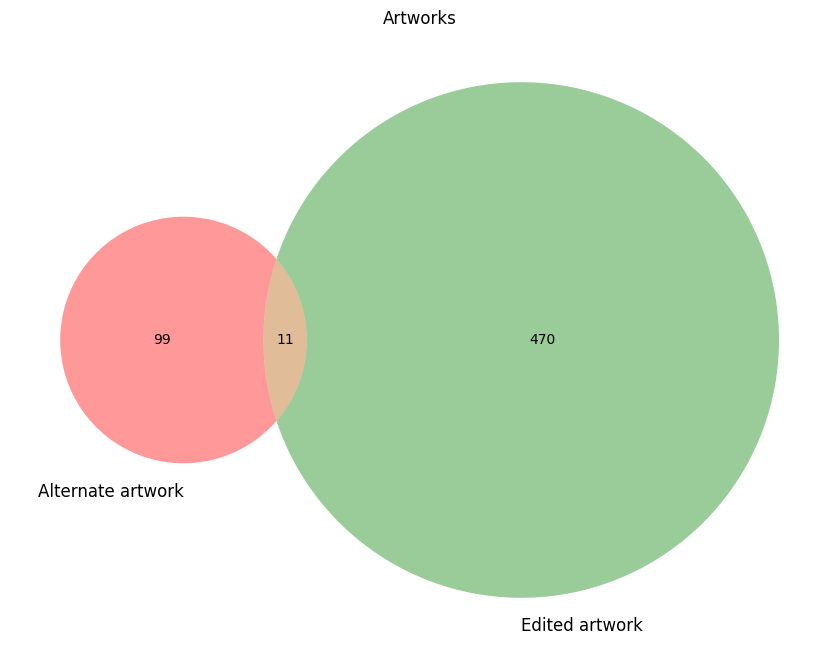

In [82]:
artwork_value_counts = formatted_full_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [83]:
artwork_crosstab = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Card type'])
artwork_crosstab

Card type,Monster Card,Spell Card,Trap Card
Artwork,,,
"(Alternate,)",88,6,5
"(Alternate, Edited)",10,1,0
"(Edited,)",262,110,98


### By primary type

In [84]:
artwork_crosstab_b = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Primary type'])
artwork_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Artwork,,,,,,,
"(Alternate,)",37,13,9,21,0,3,5
"(Alternate, Edited)",2,1,5,2,0,0,0
"(Edited,)",170,18,10,42,6,5,11


More granularity is unnecessary

## Errata

In [85]:
print('Total number of cards with name or type errata:', formatted_full_df['Errata'].count())

Total number of cards with name or type errata: 1137


In [86]:
formatted_full_df[['Name','Password','TCG status','OCG status','Errata']][formatted_full_df['Errata'].notna()]

,Name,Password,TCG status,OCG status,Errata
0,"""A"" Cell Breeding Device",34541863,Unlimited,Unlimited,"(Name,)"
9,7 Completed,86198326,Unlimited,Unlimited,"(Type,)"
10,The A. Forces,00403847,Unlimited,Unlimited,"(Type,)"
20,Abyss Playhouse - Fantastic Theater,77297908,Unlimited,Unlimited,"(Name,)"
46,Advanced Heraldry Art,61314842,Unlimited,Unlimited,"(Name,)"
...,...,...,...,...,...
12173,"Winged Dragon, Guardian of the Fortress #1",87796900,Unlimited,Unlimited,"(Name,)"
12174,"Winged Dragon, Guardian of the Fortress #2",57405307,Unlimited,Unlimited,"(Name,)"
12176,Winged Sage Falcos,87523462,Unlimited,Unlimited,"(Name,)"
12183,Wynn the Wind Charmer,37744402,Unlimited,Unlimited,"(Name,)"


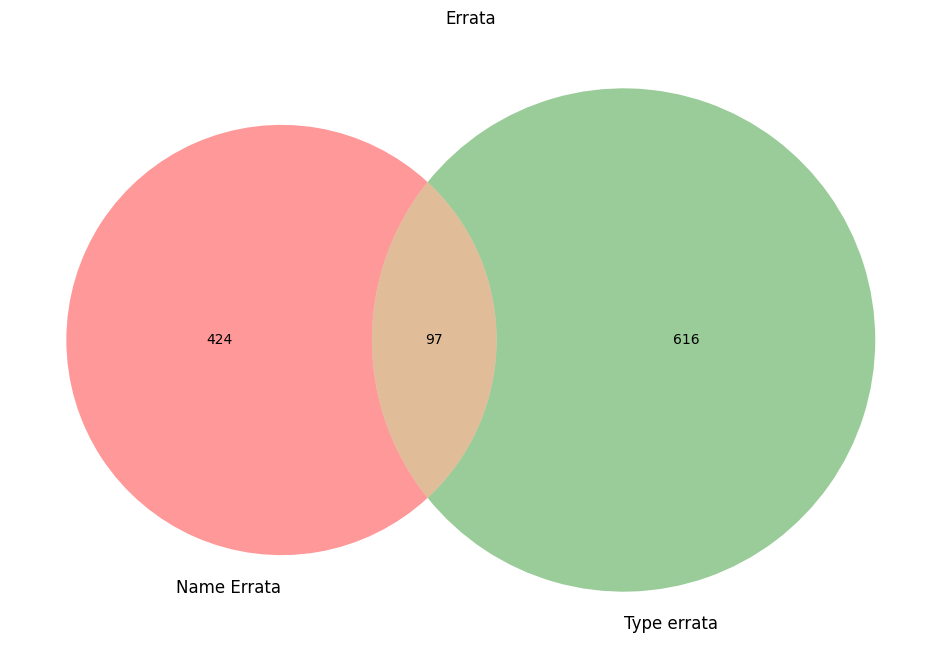

In [87]:
errata_value_counts = formatted_full_df['Errata'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Errata')
venn2(subsets = (errata_value_counts[('Name',)], errata_value_counts[('Type',)],errata_value_counts[('Name','Type')]), set_labels = ('Name Errata', 'Type errata'))
plt.show()

### By card type

In [88]:
errata_crosstab = pd.crosstab(formatted_full_df['Errata'], formatted_full_df['Card type'])
errata_crosstab

Card type,Monster Card,Spell Card,Trap Card
Errata,,,
"(Name,)",313,59,52
"(Name, Type)",74,21,2
"(Type,)",398,209,9


### By primary type

In [89]:
errata_crosstab_b = pd.crosstab(formatted_full_df['Errata'], formatted_full_df['Primary type'])
errata_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Errata,,,,,,,
"(Name,)",198,46,4,49,3,9,3
"(Name, Type)",39,10,0,18,2,5,0
"(Type,)",272,22,2,61,2,24,15


More granularity is unnecessary

### By artwork

In [90]:
errata_crosstab_c = pd.crosstab(formatted_full_df['Artwork'], formatted_full_df['Errata'])
errata_crosstab_c

Errata,"(Name,)","(Name, Type)","(Type,)"
Artwork,,,
"(Alternate,)",8,15,22
"(Alternate, Edited)",0,3,2
"(Edited,)",26,12,52


## TCG & OCG status

### TGC status

In [91]:
print('Total number of TCG status:', formatted_full_df['TCG status'].nunique())

Total number of TCG status: 7


In [92]:
formatted_full_df.groupby('TCG status', dropna=False).nunique()

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,OCG status,Modification date
TCG status,,,,,,,,,,,,,,,,,,,,
Forbidden,100,100,3,7,5,2,6,19,12,26,19,2,4,10,47,54,1,3,4,100
Illegal,38,0,3,3,5,0,6,14,5,11,12,2,2,2,6,6,0,1,1,38
Legal,22,0,1,0,1,0,5,13,6,6,7,0,0,0,0,14,1,1,1,22
Limited,80,80,3,5,6,3,6,16,9,23,21,3,1,1,41,43,3,3,4,80
Not yet released,23,22,3,7,6,1,5,5,7,5,7,0,1,1,18,15,0,0,1,23
Semi-Limited,4,4,3,2,2,0,2,2,2,2,2,0,0,0,4,4,0,1,2,4
Unlimited,11496,11493,3,9,7,6,7,24,14,80,75,13,6,60,347,1136,3,3,4,11391
NaN,439,336,3,9,8,2,7,23,11,52,38,6,4,7,82,107,1,1,4,439


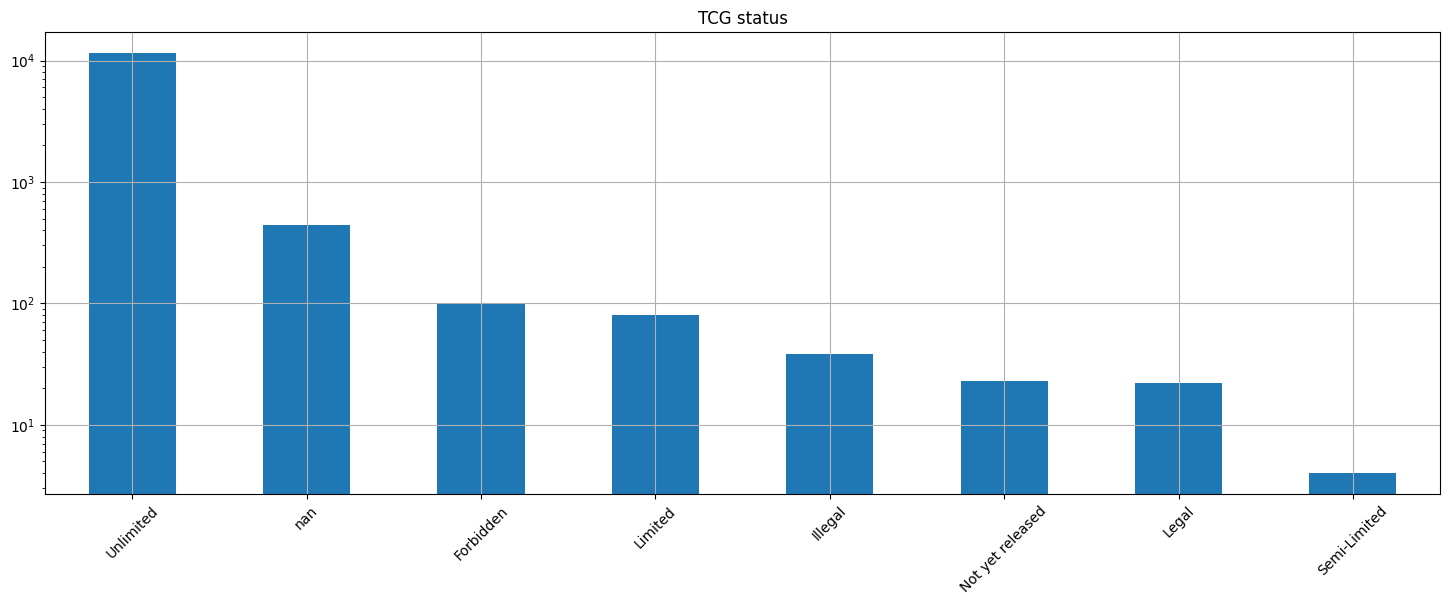

In [93]:
formatted_full_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [94]:
# Remove unlimited
tcg_crosstab = pd.crosstab(formatted_full_df['Card type'], formatted_full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Card type,,,,,,
Monster Card,64,35,22,44,10,2
Spell Card,26,2,0,34,10,1
Trap Card,10,1,0,2,3,1


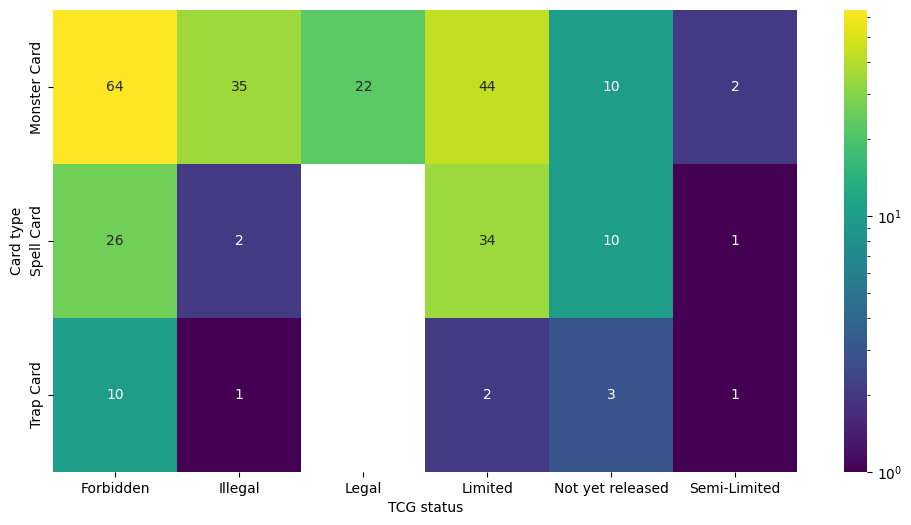

In [95]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=LogNorm())
plt.show()

#### By monster type

In [96]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(formatted_full_df['Monster type'], formatted_full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Monster type,,,,,,
Aqua,1,0,2,1,0,0
Beast,0,3,1,2,0,0
Beast-Warrior,2,3,0,2,0,0
Cyberse,2,0,1,1,1,0
Dinosaur,0,0,1,2,0,0
Divine-Beast,0,3,0,0,0,0
Dragon,11,3,1,7,2,0
Fairy,3,4,3,2,2,0
Fiend,5,2,4,3,0,0


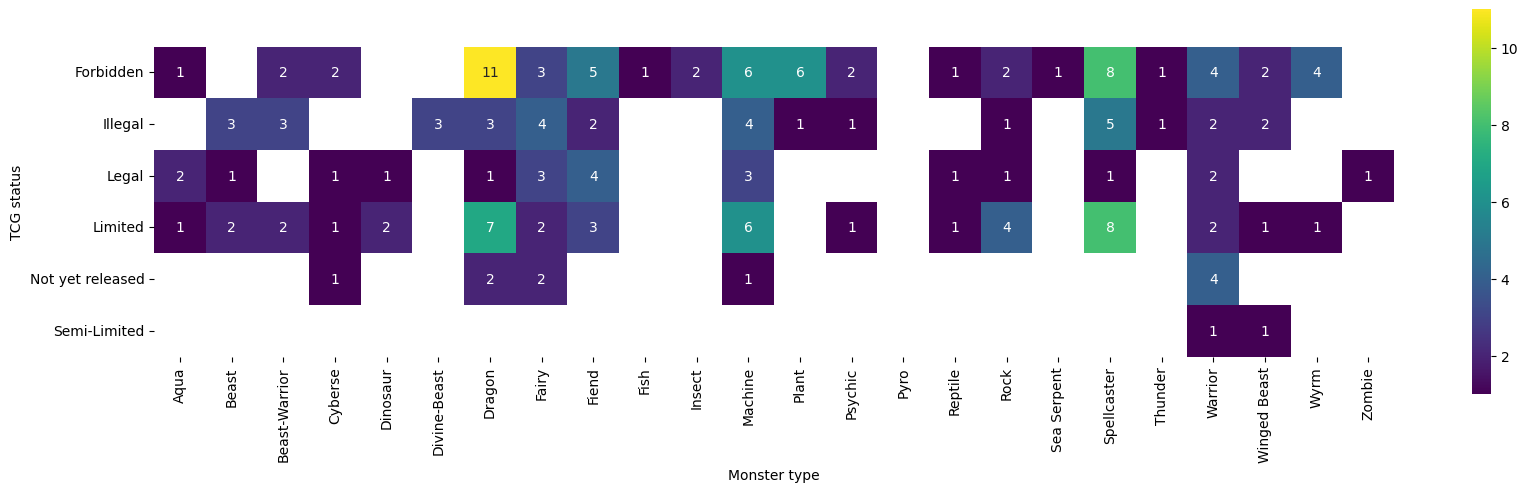

In [97]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [98]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited,Unlimited,All
Archseries,,,,,,,,
-Eyes Dragon,1,0,0,0,0,0,0,1
A-to-Z,0,0,0,0,0,0,1,1
Adventurer Token (series),0,0,0,0,0,0,3,3
Amazoness,0,0,0,0,0,0,1,1
Ancient Gear,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
Zexal,1,0,0,0,0,0,0,1
Zoodiac,3,0,0,1,0,0,0,4
roid,0,0,0,1,0,0,0,1


### OCG status

In [99]:
print('Total number of OCG status:', formatted_full_df['OCG status'].nunique())

Total number of OCG status: 7


In [100]:
formatted_full_df.groupby('OCG status', dropna=False).nunique()

,Name,Password,Card type,Property,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,Artwork,Errata,TCG status,Modification date
OCG status,,,,,,,,,,,,,,,,,,,,
Forbidden,89,89,3,6,5,3,6,19,11,27,22,3,4,8,40,45,1,3,3,89
Illegal,32,1,3,2,6,1,6,12,8,14,15,2,2,2,8,8,0,1,1,32
Legal,39,0,1,0,2,0,6,17,7,8,8,0,0,0,0,24,1,1,1,39
Limited,72,72,3,6,6,3,6,15,9,18,20,3,3,5,39,40,3,3,3,72
Not yet released,57,0,3,7,6,1,6,10,10,17,18,4,3,3,31,29,0,0,0,57
Semi-Limited,20,20,3,4,2,0,4,5,4,7,6,1,0,0,15,13,1,1,4,20
Unlimited,11850,11827,3,9,7,6,7,25,14,81,76,13,6,59,353,1154,3,3,5,11750
NaN,39,26,3,6,6,1,6,14,6,12,14,0,1,1,15,5,0,0,3,39


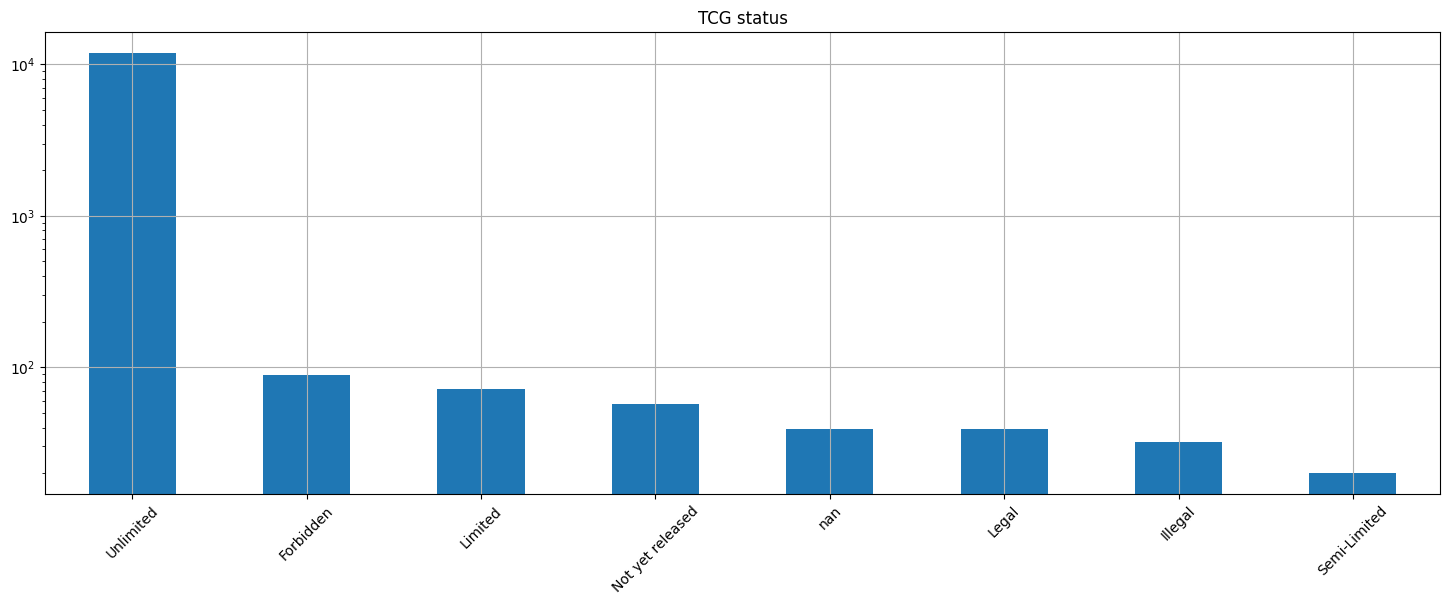

In [101]:
formatted_full_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [102]:
# Remove unlimited
ocg_crosstab = pd.crosstab(formatted_full_df['Card type'], formatted_full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

OCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Card type,,,,,,
Monster Card,57,30,39,40,37,8
Spell Card,22,1,0,29,14,11
Trap Card,10,1,0,3,6,1


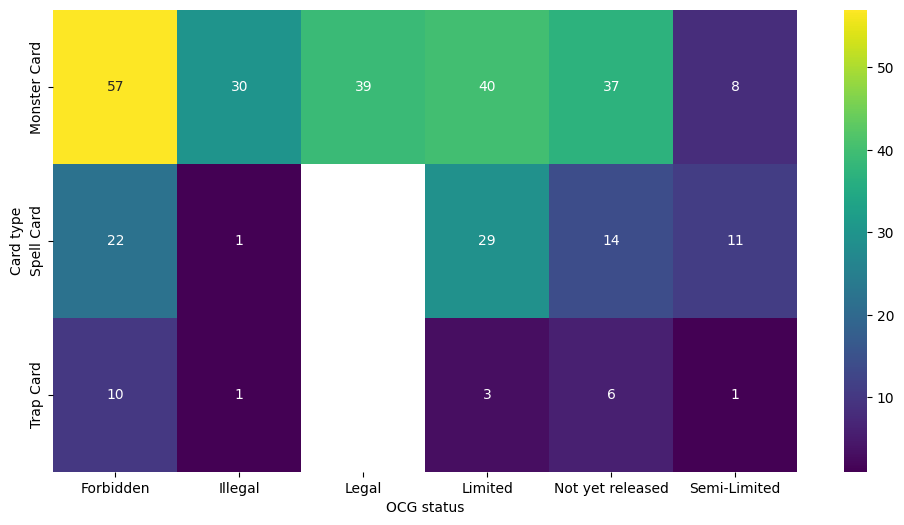

In [103]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [104]:
ocg_crosstab_b = pd.crosstab(formatted_full_df['Monster type'], formatted_full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

OCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited
Monster type,,,,,,
Aqua,2,0,2,1,0,1
Beast,1,2,4,0,0,0
Beast-Warrior,3,2,0,1,0,1
Creator God,0,0,0,0,0,0
Cyberse,2,0,2,1,7,0
Dinosaur,0,0,1,1,0,0
Divine-Beast,0,3,0,0,0,0
Dragon,10,3,1,4,2,0
Fairy,2,3,4,4,5,0


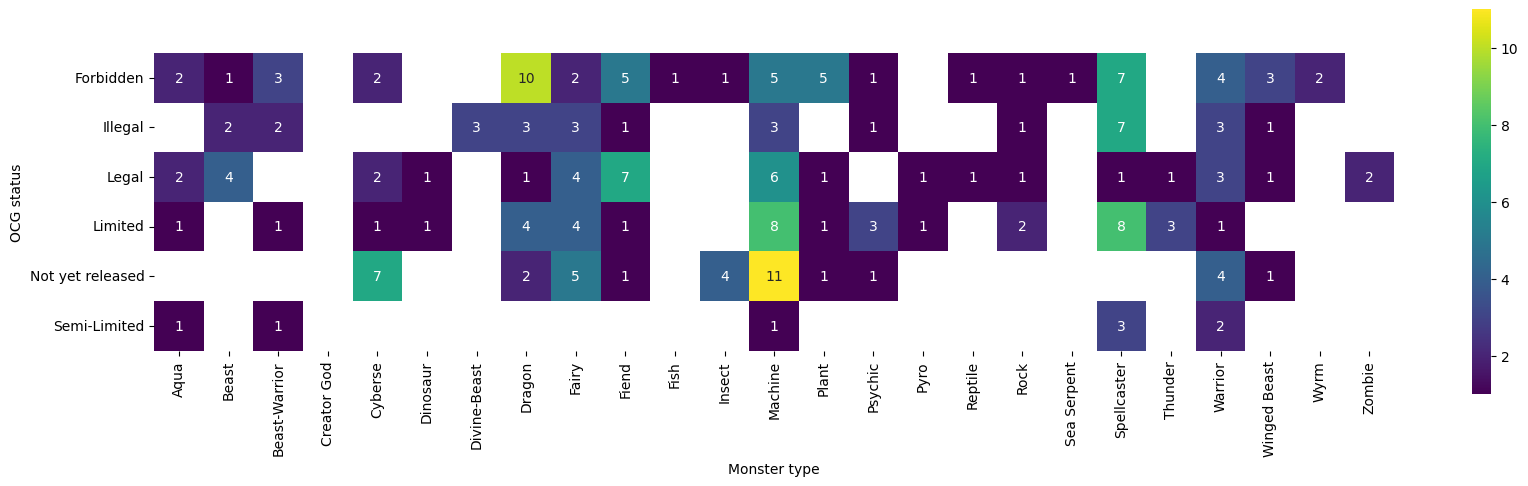

In [105]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [106]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

OCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited,All
Archseries,,,,,,,
-Eyes Dragon,1,0,0,0,1,0,2
A-to-Z,0,0,0,0,0,1,1
Adventurer Token (series),1,0,0,1,0,1,3
Amazoness,1,0,0,0,0,0,1
Ancient Gear,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...
Zombie counterpart,0,0,1,0,0,0,1
Zoodiac,2,0,0,2,0,0,4
roid,0,0,0,1,0,0,1


### TCG vs. OCG status

In [107]:
cg_crosstab = pd.crosstab(formatted_full_df['OCG status'],formatted_full_df['TCG status'], dropna=False, margins = False)
cg_crosstab

TCG status,Forbidden,Illegal,Legal,Limited,Not yet released,Semi-Limited,Unlimited
OCG status,,,,,,,
Forbidden,71,0,0,6,0,0,12
Illegal,0,26,0,0,0,0,0
Legal,0,0,22,0,0,0,0
Limited,7,0,0,37,0,0,28
Semi-Limited,1,0,0,2,0,2,15
Unlimited,21,0,0,35,22,2,11417


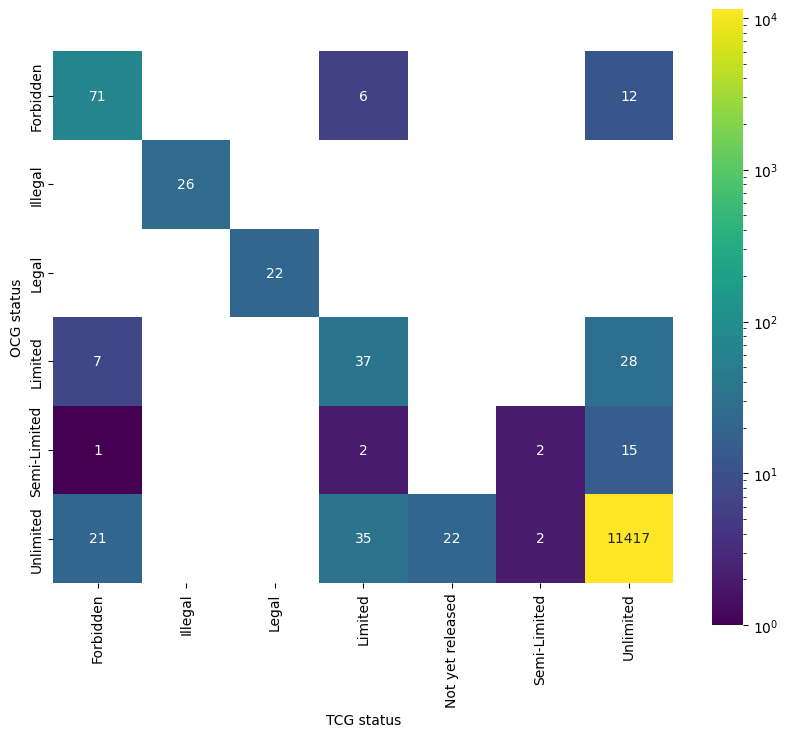

In [108]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=LogNorm())
plt.show()

# HTML export

In [109]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML
[NbConvertApp] Writing 621681 bytes to ../Cards.html


In [110]:
print('Report exported to HTML')

Report exported to HTML


# Git

In [111]:
! git add "../*[Cc]ards*"

In [112]:
! git commit -m {"'Cards update-" + pd.Timestamp.now().strftime("%d%m%Y")+"'"}

[main e16fd15] Cards update-15122022
 3 files changed, 14886 insertions(+), 15888 deletions(-)
 create mode 100644 Data/All_cards_1671140661.csv
 create mode 100644 Data/Cards_changelog_1671140661.csv
 rewrite Source/Cards.ipynb (98%)


In [113]:
! git push

fatal: Failed to locate 'gpg' executable on the path.
Username for 'https://github.com': ^C


# Searches

In [ ]:
formatted_full_df.loc[formatted_full_df['OCG status'] == 'Not yet released'].loc[formatted_full_df['TCG status'] == 'Not yet released']